## Import Packages

1. To build a recurrent neural network, we start by importing the Dense layer, Activation layer, and Loss function that you implemented in Lab4 & Flatten layer you implemented in Lab5. Ensure the following three files are located in the same directory as this notebook, and follow the instructions to complete the setup:
    - Dense.py : Copy the **Dense class** you had implemented in Lab4 to it.
    - Activation.py : Copy the **Activation class** you had implemented in Lab4 to it.
    - Loss.py : Copy **compute_CCE_loss** function you had implemented in Lab4 to it.
    - Flatten.py: Copy **Flatten class** you had implemented in Lab5 to it.\
    Note: you should copy both `forward()` and `backward()` in class `Flatten` in Lab5.


⚠️ **WARNING** ⚠️:
*   Please do not import any other packages in this lab.
*   np.random.seed(seed) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed.

❗ **Important** ❗: Please do not change the code outside this code bracket.
```
### START CODE HERE ###
...
### END CODE HERE ###
```



### Mount Google Drive (optional)

In [4]:
### START CODE HERE ###
# from google.colab import drive
# import os
# drive.mount('/content/drive')
# os.chdir('YOUR PATH')
### END CODE HERE ###

In [5]:
###### import your Lab4 & Lab5 code (Don't change this part) ######
class Dense():
    def __init__(self, n_x, n_y, seed=1):
        self.n_x = n_x
        self.n_y = n_y
        self.seed = seed
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Argument:
        self.n_x -- size of the input layer
        self.n_y -- size of the output layer
        self.parameters -- python dictionary containing your parameters:
                           W -- weight matrix of shape (n_x, n_y)
                           b -- bias vector of shape (1, n_y)
        """
        sd = np.sqrt(6.0 / (self.n_x + self.n_y))
        np.random.seed(self.seed)
        W = np.random.uniform(-sd, sd, (self.n_y, self.n_x)).T      # the transpose here is just for the code to be compatible with the old codes
        b = np.zeros((1, self.n_y))

        assert(W.shape == (self.n_x, self.n_y))
        assert(b.shape == (1, self.n_y))

        self.parameters = {"W": W, "b": b}

    def forward(self, A):
        """
        Implement the linear part of a layer's forward propagation.

        Arguments:
        A -- activations from previous layer (or input data) with the shape (n, f^[l-1])
        self.cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently

        Returns:
        Z -- the input of the activation function, also called pre-activation parameter with the shape (n, f^[l])
        """

        # GRADED FUNCTION: linear_forward
        ### START CODE HERE ###

        self.cache = (A, self.parameters["W"], self.parameters["b"])
        Z = np.dot(A, self.parameters["W"]) + self.parameters["b"]

        ### END CODE HERE ###

        assert(Z.shape == (A.shape[0], self.parameters["W"].shape[1]))

        return Z

    def backward(self, dZ):
        """
        Implement the linear portion of backward propagation for a single layer (layer l)

        Arguments:
        dZ -- Gradient of the loss with respect to the linear output (of current layer l), same shape as Z
        self.cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
        self.dW -- Gradient of the loss with respect to W (current layer l), same shape as W
        self.db -- Gradient of the loss with respect to b (current layer l), same shape as b

        Returns:
        dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev

        """
        A_prev, W, b = self.cache
        m = A_prev.shape[0]

        # GRADED FUNCTION: linear_backward
        ### START CODE HERE ###

        self.dW = np.dot(A_prev.T, dZ) / m
        self.db = np.sum(dZ, axis=0, keepdims=True) / m
        dA_prev = np.dot(dZ, W.T)


        ### END CODE HERE ###

        assert (dA_prev.shape == A_prev.shape)
        assert (self.dW.shape == self.parameters["W"].shape)
        assert (self.db.shape == self.parameters["b"].shape)

        return dA_prev

    def update(self, learning_rate):
        """
        Update parameters using gradient descent

        Arguments:
        learning rate -- step size
        """

        # GRADED FUNCTION: linear_update_parameters
        ### START CODE HERE ###
        # self.parameters["W"] = None
        # self.parameters["b"] = None

        self.parameters["W"] -= learning_rate * self.dW
        self.parameters["b"] -= learning_rate * self.db


        ### END CODE HERE ###


class Activation():
    def __init__(self, activation_function, loss_function):
        self.activation_function = activation_function
        self.loss_function = loss_function
        self.cache = None

    def forward(self, Z):
        if self.activation_function == "sigmoid":
            """
            Implements the sigmoid activation in numpy

            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of sigmoid(z), same shape as Z
            """

            # GRADED FUNCTION: sigmoid_forward
            ### START CODE HERE ###
            A = 1 / (1 + np.exp(-Z))
            self.cache = Z

            ### END CODE HERE ###

            return A
        elif self.activation_function == "relu":
            """
            Implement the RELU function in numpy
            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation
            Returns:
            A -- output of relu(z), same shape as Z

            """

            # GRADED FUNCTION: relu_forward
            ### START CODE HERE ###
            A = np.maximum(0, Z)
            self.cache = Z
            # print("Z in foward", Z)
            # print("Z.shape in foward", Z.shape)

            ### END CODE HERE ###

            assert(A.shape == Z.shape)

            return A
        elif self.activation_function == "softmax":
            """
            Implements the softmax activation in numpy

            Arguments:
            Z -- np.array with shape (n, C)
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of softmax(z), same shape as Z
            """

            # GRADED FUNCTION: softmax_forward
            ### START CODE HERE ###
            A = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
            self.cache = Z
            ### END CODE HERE ###

            return A
        elif self.activation_function == "linear":
            """
            Linear activation (returns Z directly).
            """
            self.cache = Z
            return Z

        else:
            raise ValueError(f"Unsupported activation function: {self.activation_function}")


    def backward(self, dA=None, Y=None):
        if self.activation_function == "sigmoid":
            """
            Implement the backward propagation for a single SIGMOID unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: sigmoid_backward
            ### START CODE HERE ###
            Z = self.cache
            # Z is a 2D np array
            # Z = np.array(Z, copy=True, dtype=np.float32)
            s = 1 / (1 + np.exp(-1*Z))
            dZ = dA * s * (1 - s)

            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "relu":
            """
            Implement the backward propagation for a single RELU unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: relu_backward
            ### START CODE HERE ###
            Z = self.cache
            dZ = np.array(dA, copy=True)
            dZ[Z <= 0] = 0
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "softmax":
            """
            Implement the backward propagation for a [SOFTMAX->CCE LOSS] unit.
            Arguments:
            Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """

            # GRADED FUNCTION: softmax_backward
            ### START CODE HERE ###
            Z = self.cache
            s = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
            dZ = s - Y
            ### END CODE HERE ###

            assert (dZ.shape == self.cache.shape)

            return dZ

        elif self.activation_function == "linear":
            """
            Backward propagation for linear activation.
            """
            return dA

        else:
            raise ValueError(f"Unsupported activation function: {self.activation_function}")


def compute_CCE_loss(AL, Y):
    """
    Implement the categorical cross-entropy loss function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (n, C)
    Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)

    Returns:
    loss -- categorical cross-entropy loss
    """

    n = Y.shape[0]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code)
    # loss = None
    loss = - (1/n) * np.sum(Y * np.log(AL + 1e-5 ))
    ### END CODE HERE ###

    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())

    return loss
def compute_MSE_loss(AL, Y):
    m = Y.shape[0]
    loss = (1/m) * np.sum(np.square(AL - Y))
    return loss


class Flatten():
    def __init__(self):
        pass
    def forward(self, A_prev):
        """
        Implements the forward pass of the flatten layer

        Arguments:
        A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)

        Returns:
        A -- output of the flatten layer, a 2-dimensional array of shape (m, (n_H_prev * n_W_prev * n_C_prev))
        """

        # Save information in "cache" for the backward pass
        self.cache = A_prev.shape

        ### START CODE HERE ###
        # A = ...
        A = A_prev.reshape(A_prev.shape[0], -1)
        ### END CODE HERE ###
        return A
    def backward(self, dA):
        """
        Implements the backward pass of the flatten layer

        Arguments:
        dA -- Input data, a 2-dimensional array

        Returns:
        dA_prev -- An array with its original shape (the output shape of its' previous layer).
        """
        ### START CODE HERE ###
        # dA_prev = ...
        dA_prev = dA.reshape(self.cache)
        ### END CODE HERE ###
        return dA_prev


##################################

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

outputs = {}

# Basic Part

## RNN Class (30%)
The RNN class implements a simple Recurrent Neural Network (RNN) layer. This class includes methods for initializing parameters, performing the forward pass, computing gradients during the backward pass, and updating the weights.

Structure overview:
<figure> <img src="https://imgur.com/nU7xrBe.png" width="580" height="400">
</figure>
RNN connection:
<figure>
<img src="https://imgur.com/4JQX0se.png" width="500" height="250">
</figure>
Data insights:
<figure> <img src="https://imgur.com/c2MI3mj.png" width="400" height="220">
</figure>
In each neuron:
<figure> <img src="https://imgur.com/luXS4zv.png" width="300" height="220">
</figure>

1.   **Initializaon**

    *   `input_size`: The number of input features for each time step.
    *   `rnn_units`: The number of units (neurons) in the RNN layer.
    *   `seed`: A random seed for weight initialization to ensure reproducibility.

2.   **Initialize parameters** (3%)
    * `Wx`: The weight matrix for the input to hidden connections. It has a shape of `(rnn_units, input_size)`
    * `Wh`: The weight matrix for the hidden to hidden connections. It has a shape of `(rnn_units, rnn_units)`
    * `bh`: The bias vector for the hidden state. It has a shape of `(rnn_units, 1)`, where rnn_units is the number of units in the RNN layer.
3.  **Forward** (12%) \
* `X`: Input data of shape `(batch_size, timesteps, input_size)`
* The forward pass computes the hidden state `h_t` (shape of `(batch_size, self.rnn_units)`)at each time step `t` using the following formula:
$ h_t = \tanh(W_x \cdot x_t + W_h \cdot h_{t-1} + b_h)$
    * $W_x$ is the weight matrix for the input to hidden connections.
    * $W_h$ is the weight matrix for the hidden to hidden connections.
    * $b_h$ is the bias vector.
    * $x_t$ is the input at time step t.
    * $h_{t-1}$ is the hidden state from the previous time step.
    * $\tanh$ is the hyperbolic tangent activation function.
* Output would be shape of `(batch_size, rnn_units)`
4. **Backward** (15%) \
Reference (Backpropagation Through Time):
https://www.pycodemates.com/2023/08/backpropagation-through-time-explained-with-derivations.html
* `dH`: Gradient of the loss with respect to the hidden state, typically of shape `(batch_size, rnn_units, 1)`.
* The backward pass computes the gradients of the loss with respect to the weights and biases using the following formulas:
    * Gradient of the loss with respect to the hidden state(derivative of `tanh`):\
    $\delta_t = (1 - h_t^2) \cdot \delta_{t+1}$
        * $\delta_t$ is the gradient of the loss with respect to the hidden state at time step t.
        * $h_t$ is the hidden state at time step t
    * Gradients with respect to the weights and biases (accumulate the gradients over all time steps):
        1. $\frac{\partial L}{\partial W_x} = ∑_{t=0}^{timesteps} \delta_t^T \cdot x_t$
        2. $\frac{\partial L}{\partial W_h} = ∑_ {t=0}^{timesteps} \delta_t^T \cdot h_{t-1}$
        3. $\frac{\partial L}{\partial b_h} = ∑_{t=0}^{timesteps} \delta_t^T$
        * $\frac{\partial L}{\partial W_x}$ is the gradient of the loss with respect to the input to hidden weights.
        * $\frac{\partial L}{\partial W_h}$ is the gradient of the loss with respect to the hidden to hidden weights.
        * $\frac{\partial L}{\partial b_h}$ is the gradient of the loss with respect to the hidden bias.
        * $x_t$ is the input at time step t.
        * $h_{t-1}$ is the hidden state from the previous time step.
    * Gradient with respect to the previous hidden state:
    $\frac{\partial L}{\partial h_{t-1}} = \delta_t \cdot W_h$
    * Then divide each gradient by `batch_size`.
    * Gradient clipping (optional) is recommended in RNN since RNN rely on backpropagation through time where data might contain large timesteps and it might cause gradient explosion or vanishing. **Note**: You can't do gradient clipping in the function testing (`test_baward()`)


In [6]:
class RNN():
    def __init__(self, input_size, rnn_units, seed=1):
        """
        Initialize the SimpleRNN layer.

        Parameters:
        input_size (int): Number of input features.
        rnn_units (int): Number of units in the RNN layer.
        seed (int): Random seed for weight initialization.
        """
        self.input_size = input_size
        self.rnn_units = rnn_units
        self.seed = seed
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Initialize the weights and biases for the RNN layer.
        """
        np.random.seed(self.seed)

        ### START CODE HERE ###
        # Multiply by 0.01 is for testing reason.
        # self.Wx = np.random.randn(None) * 0.01     # Input to hidden weights , with shape of (rnn_units, input_size).
        # self.Wh = np.random.randn(None) * 0.01     # Hidden to hidden weights, with shape of (rnn_units, rnn_units).
        # self.bh = np.zeros(None)     # Hidden bias, with shape of (rnn_units, 1).
        self.Wx = np.random.randn(self.rnn_units, self.input_size) * 0.01  # Input to hidden weights
        self.Wh = np.random.randn(self.rnn_units, self.rnn_units) * 0.01  # Hidden to hidden weights
        self.bh = np.zeros((self.rnn_units, 1))                            # Hidden bias
        ### END CODE HERE ###

    def forward(self, X):
        """
        Perform the forward pass through the RNN layer.

        Parameters:
        X (ndarray): Input data of shape (batch_size, timesteps, input_size).

        Returns:
        ndarray: Output of the RNN layer (hidden state).
        """
        batch_size, timesteps, _ = X.shape
        ### START CODE HERE ###
        # self.h = None       # Initialize hidden state, with shape of (batch_size, self.rnn_units).
        # self.hs = None      # Store hidden states for backward pass, list of self.h.
        self.h = np.zeros((batch_size, self.rnn_units))  # Initialize hidden state
        self.hs = []                                     # Store hidden states for backward pass
        ### END CODE HERE ###

        self.xs = []  # Store inputs for backward pass

        for t in range(timesteps):
            ### START CODE HERE ###
            # x_t = None              # Get input at time step t for all data in X.
            # self.xs.append(x_t)
            # self.h = None           # Update hidden state according to the formula of h_t.
            # self.hs.append(self.h)
            x_t = X[:, t, :]                   # Get input at time step t
            self.xs.append(x_t)
            self.h = np.tanh(np.dot(x_t, self.Wx.T) + np.dot(self.h, self.Wh.T) + self.bh.T)  # Update hidden state
            self.hs.append(self.h)
            ### END CODE HERE ###

        return self.h


    def backward(self, dH):
        """
        Perform the backward pass through the RNN layer.

        Parameters:
        dH (ndarray): Gradient of the loss with respect to the hidden state.
        clip_value (float): Value to clip the gradients to prevent exploding gradients.

        Returns:
        ndarray: Gradient of the loss with respect to the input.
        """
        batch_size, _ = dH.shape
        ### START CODE HERE ###
        # self.dL_dWx = None        # Initialized with same shape as Wx.
        # self.dL_dWh = None        # Initialized with same shape as Wh.
        # self.dL_dbh = None        # Initialized with same shape as bh.
        self.dL_dWx = np.zeros_like(self.Wx)  # Initialize gradients for Wx
        self.dL_dWh = np.zeros_like(self.Wh)  # Initialize gradients for Wh
        self.dL_dbh = np.zeros_like(self.bh)  # Initialize gradients for bh
        ### END CODE HERE ###
        dL_dh = dH

        for t in reversed(range(len(self.hs))):
            x_t = self.xs[t]  # Get input at time step t
            h = self.hs[t]
            h_prev = self.hs[t-1] if t > 0 else np.zeros_like(h)
            ### START CODE HERE ###
            # dL_dh_raw = None     # Derivative of tanh
            # self.dL_dWx = None   # Gradient w.r.t. Wx
            # self.dL_dWh = None   # Gradient w.r.t. Wh
            # self.dL_dbh = None   # Gradient w.r.t. bh
            # dL_dh = None         # Gradient w.r.t. previous hidden state (Wh)
            dL_dh_raw = dL_dh * (1 - h**2)  # Derivative of tanh
            self.dL_dWx += np.dot(dL_dh_raw.T, x_t)  # Gradient w.r.t. Wx
            self.dL_dWh += np.dot(dL_dh_raw.T, h_prev)  # Gradient w.r.t. Wh
            self.dL_dbh += np.sum(dL_dh_raw, axis=0, keepdims=True).T  # Gradient w.r.t. bh
            dL_dh = np.dot(dL_dh_raw, self.Wh)  # Gradient w.r.t. previous hidden state
            ### END CODE HERE ###

        ### START CODE HERE ###
        # Average gradients over the batch.
        # self.dL_dWx = None
        # self.dL_dWh = None
        # self.dL_dbh = None
        self.dL_dWx /= batch_size
        self.dL_dWh /= batch_size
        self.dL_dbh /= batch_size
        ### END CODE HERE ###

        ### START CODE HERE ###
        # Gradient part (optional), you can't run this part while testing the backward function !!!
        # clip_value = 2.0
        # Clip gradients to prevent exploding gradients
        # np.clip(self.dL_dWx, -clip_value, clip_value, out=self.dL_dWx)
        # np.clip(self.dL_dWh, -clip_value, clip_value, out=self.dL_dWh)
        # np.clip(self.dL_dbh, -clip_value, clip_value, out=self.dL_dbh)
        ### END CODE HERE ###

        return dL_dh

    def update(self, learning_rate):
        """
        Update the weights and biases using the computed gradients.

        Parameters:
        learning_rate (float): Learning rate for weight updates.
        """
        ### START CODE HERE ###
        # Update each weights.
        # self.Wx = None
        # self.Wh = None
        # self.bh = None
        self.Wx -= learning_rate * self.dL_dWx
        self.Wh -= learning_rate * self.dL_dWh
        self.bh -= learning_rate * self.dL_dbh
        ### END CODE HERE ###

### Functions testing


#### `initialize_parameter` function

In [7]:
def test_initialization(save_to_output = False):
    input_size = 5
    rnn_units = 3
    rnn = RNN(input_size, rnn_units)
    print("Wx shape:", rnn.Wx.shape)
    print("Wh shape:", rnn.Wh.shape)
    print("bh shape:", rnn.bh.shape)
    if save_to_output == True:
        outputs['RNN_initialization'] = {"Wx shape": rnn.Wx.shape, "Wh shape": rnn.Wh.shape, "bh shape": rnn.bh.shape}
test_initialization(True)

Wx shape: (3, 5)
Wh shape: (3, 3)
bh shape: (3, 1)


Expected output:

|Output|Value|
|---|---|
|Wx shape:|(3, 5)|
|Wh shape:|(3, 3)|
|bh shape:|(3, 1)|

#### `forward` function


In [8]:
def test_forward(seed, save_to_output = False):
    input_size = 5
    rnn_units = 3
    batch_size = 2
    timesteps = 4
    # Initialize the RNN layer
    rnn = RNN(input_size, rnn_units)
    # Create a sample input of shape (batch_size, timesteps, input_size)
    np.random.seed(seed)   # Don't change the seed!
    X = np.random.randn(batch_size, timesteps, input_size)
    # Perform the forward pass
    output = rnn.forward(X)

    if save_to_output == False:
        # Print the output
        print("Input shape:", X.shape)
        print("Input:")
        print(X)
        print("Output shape of RNN layer:", output.shape)
        print("Output of the RNN layer (hidden state):")
        print(output)

    if save_to_output == True:
        outputs['RNN_forward'] = {"X shape": X.shape, "X": X, "Output shape": output.shape, "Output": output}

# Run the test with seed 1 to compare with expected outputs.
test_forward(1)

# Run with seed 42 and save the answer.
test_forward(42, True)

Input shape: (2, 4, 5)
Input:
[[[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
  [-2.3015387   1.74481176 -0.7612069   0.3190391  -0.24937038]
  [ 1.46210794 -2.06014071 -0.3224172  -0.38405435  1.13376944]
  [-1.09989127 -0.17242821 -0.87785842  0.04221375  0.58281521]]

 [[-1.10061918  1.14472371  0.90159072  0.50249434  0.90085595]
  [-0.68372786 -0.12289023 -0.93576943 -0.26788808  0.53035547]
  [-0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613]
  [-0.0126646  -1.11731035  0.2344157   1.65980218  0.74204416]]]
Output shape of RNN layer: (2, 3)
Output of the RNN layer (hidden state):
[[-0.00873835  0.02641052 -0.00287992]
 [-0.00596289 -0.01742189  0.02418844]]


Expected output of `forward`:

| Output | Value |
|---|---|
| Input shape | (2, 4, 5) |
| Input | `[[[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]`<br>  `[-2.3015387   1.74481176 -0.7612069   0.3190391  -0.24937038]`<br>  `[ 1.46210794 -2.06014071 -0.3224172  -0.38405435  1.13376944]`<br>  `[-1.09989127 -0.17242821 -0.87785842  0.04221375  0.58281521]]`<br><br> `[[-1.10061918  1.14472371  0.90159072  0.50249434  0.90085595]`<br>  `[-0.68372786 -0.12289023 -0.93576943 -0.26788808  0.53035547]`<br>  `[-0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613]`<br>  `[-0.0126646  -1.11731035  0.2344157   1.65980218  0.74204416]]]]` |
| Output shape of RNN layer | (2, 3) |
| Output of the RNN layer (hidden state) | `[[-0.00873835  0.02641052 -0.00287992]`<br> `[-0.00596289 -0.01742189  0.02418844]]` |

#### `backward` function

In [9]:
def test_backward(seed, save_to_output = False):
    input_size = 5
    rnn_units = 3
    batch_size = 2
    timesteps = 4

    # Initialize the RNN layer
    rnn = RNN(input_size, rnn_units)
    np.random.seed(seed)   # Don't change the seed!
    # Create a sample input of shape (batch_size, timesteps, input_size)
    X = np.random.randn(batch_size, timesteps, input_size)
    # Perform the forward pass
    rnn.forward(X)
    # Create a sample gradient of the loss with respect to the hidden state
    dH = np.random.randn(batch_size, rnn_units)
    # Perform the backward pass
    dL_dX = rnn.backward(dH)
    if save_to_output == False:
        print("dH shape: ", dH.shape)
        print("dH:")
        print(dH)
        # Print the gradients
        print("dL_dX shape:", dL_dX.shape)
        print("Gradient w.r.t. input (dL_dX):")
        print(dL_dX)
        print("dL_dWx shape:", rnn.dL_dWx.shape)
        print("Gradient w.r.t. Wx (dL_dWx):")
        print(rnn.dL_dWx)
        print("dL_dWh shape:", rnn.dL_dWh.shape)
        print("Gradient w.r.t. Wh (dL_dWh):")
        print(rnn.dL_dWh)
        print("dL_dbh shape:", rnn.dL_dbh.shape)
        print("Gradient w.r.t. bh (dL_dbh):")
        print(rnn.dL_dbh)

    if save_to_output == True:
        outputs['RNN_backward'] = {"dH shape": dH.shape, "dH": dH, "dL_dX shape": dL_dX.shape, "dL_dX": dL_dX, "dL_dWx shape": rnn.dL_dWx.shape,
                                   "dL_dWx": rnn.dL_dWx, "dL_dWh shape": rnn.dL_dWh.shape, "dL_dWh": rnn.dL_dWh, "dL_dbh shape": rnn.dL_dbh.shape, "dL_dbh": rnn.dL_dbh}

# Run the test with seed 1 to compare with expected outputs.
test_backward(1)

# Run with seed 42 and save the answer.
test_backward(42, True)

dH shape:  (2, 3)
dH:
[[-0.19183555 -0.88762896 -0.74715829]
 [ 1.6924546   0.05080775 -0.63699565]]
dL_dX shape: (2, 3)
Gradient w.r.t. input (dL_dX):
[[-1.30293142e-08  5.55316892e-09 -2.93987480e-08]
 [ 8.78019041e-09  2.41595285e-08 -1.33357681e-08]]
dL_dWx shape: (3, 5)
Gradient w.r.t. Wx (dL_dWx):
[[ 0.09855041 -0.91665683  0.29245483  1.41272981  0.57684949]
 [ 0.48200032  0.06164319  0.40009246  0.02920006 -0.24340623]
 [ 0.42661386  0.4160692   0.25830352 -0.53769917 -0.44331323]]
dL_dWh shape: (3, 3)
Gradient w.r.t. Wh (dL_dWh):
[[-0.00663169  0.01738478 -0.0106337 ]
 [-0.02325593  0.03069429 -0.03469078]
 [-0.01936184  0.02200992 -0.02853306]]
dL_dbh shape: (3, 1)
Gradient w.r.t. bh (dL_dbh):
[[ 0.73406116]
 [-0.42812618]
 [-0.69714697]]


Expected output:

| Output | Value |
|---|---|
|dH shape:|(2, 3)|
|dH:|`[[-0.19183555 -0.88762896 -0.74715829]`<br>`[ 1.6924546   0.05080775 -0.63699565]]`|
|dL_dX shape:| (2, 3)|
|Gradient w.r.t. input (dL_dX):| `[[-1.30293142e-08  5.55316892e-09 -2.93987480e-08]`<br>`[ 8.78019041e-09  2.41595285e-08 -1.33357681e-08]]`|
|dL_dWx shape:| (3, 5)|
|Gradient w.r.t. Wx (dL_dWx):|`[[ 0.09855041 -0.91665683  0.29245483  1.41272981  0.57684949]`<br>`[ 0.48200032  0.06164319  0.40009246  0.02920006 -0.24340623]`<br>`[ 0.42661386  0.4160692   0.25830352 -0.53769917 -0.44331323]]`|
|dL_dWh shape:| (3, 3)|
|Gradient w.r.t. Wh (dL_dWh):|`[[-0.00663169  0.01738478 -0.0106337 ]`<br>`[-0.02325593  0.03069429 -0.03469078]`<br>`[-0.01936184  0.02200992 -0.02853306]]`|
|dL_dbh shape:| (3, 1)|
|Gradient w.r.t. bh (dL_dbh):|`[[ 0.73406116]`<br>`[-0.42812618]`<br>`[-0.69714697]]`|

## Model class (10%)
The `Model` class provides a framework for building and training neural networks.
1.   `add()` is just like the function in previous Lab, we can call `model.add( )` to sequentially add a layer into the model.
2.   `forward()` performs the forward propagation of data through the layers, calculating predictions
3.   In `backward()`, we have to check if the activation function is *softmax* to make sure we call the right `backward()`.
4.   `train()` function will be used to train the model, here, we can decide which loss function `BCE` or `MSE` we want to train with. And also calculate the loss for validation data.
5. `plot_losses()` function can show the history of the training and validation loss to see if the training works.

In [10]:
class Model():
    def __init__(self):
        self.layers = []

    def add(self, layer):
        """
        Sequentially add a layer into the model.

        Parameters:
        layer: Different layers class.
        """
        ### START CODE HERE ###
        # None
        self.layers.append(layer)
        ### END CODE HERE ###

    def forward(self, X):
        for layer in self.layers:
            if layer.__class__.__name__ == 'RNN':
                if len(X.shape) < 3:                                # If the RNN layer is stacked after another RNN layer.
                    ### START CODE HERE ###
                    # X = None                # We have to treat the output size of first layer (rnn_units) as the feature size (input_size) of the second layer.
                    X = X[:, np.newaxis, :]  # Add a timestep dimension
                    ### END CODE HERE ###
                X = layer.forward(X)
            else:
                X = layer.forward(X)
        return X

    def backward(self, dA, Y):
        for layer in reversed(self.layers):
            if isinstance(layer, Activation) and layer.activation_function == "softmax":
                ### START CODE HERE ###
                # dA = None                   # softmax activation backward.
                dA = layer.backward(dA, Y)  # softmax activation backward with true labels
                ### END CODE HERE ###
            else:
                ### START CODE HERE ###
                # dA = None
                dA = layer.backward(dA)  # Regular backward
                ### END CODE HERE ###
        return dA

    def update(self, learning_rate):
        for layer in self.layers:       # Update for every layers.
            ### START CODE HERE ###
            # None
            if hasattr(layer, "update"):  # Check if the layer has an update method
                layer.update(learning_rate)
            ### END CODE HERE ###

    def train(self, X_train, y_train, X_val, y_val, epochs=10, learning_rate=0.001, batch_size = 32, loss_function='mse'):
        self.train_losses = []  # Initialize a list to store training losses
        self.val_losses = []  # Initialize a list to store validation losses
        for epoch in range(epochs):
            total_loss = 0
            ### START CODE HERE ###
            # num_batches = None    # Calculate the number of batches
            num_batches = len(X_train) // batch_size  # Calculate the number of batches
            ### END CODE HERE ###

            with tqdm(total=num_batches, desc=f"Epoch {epoch + 1}/{epochs}", unit="batch") as pbar:
                for batch_idx in range(num_batches):

                    ### START CODE HERE ###
                    # Get the batch data
                    # X_batch = None
                    # y_batch = None
                    X_batch = X_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]
                    y_batch = y_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]
                    ### END CODE HERE ###

                    ### START CODE HERE ###
                    # 1. Forward to get the prediction.
                    # 2. Calculate the loss according to your parameters ('cce' or 'mse').
                    # 3. Calculate dA.
                    # 4. backward with the calculated dA.
                    # 5. update the parameters.
                    # y_pred = None
                    # # Compute loss
                    # if loss_function == 'cce':
                    #     loss = None
                    # elif loss_function == 'mse':
                    #     loss = None
                    # else:
                    #     raise ValueError("Unsupported loss function")

                    # total_loss += loss
                    # dA = None
                    # None
                    # 1. Forward to get the prediction.
                    y_pred = self.forward(X_batch)

                    # 2. Calculate the loss according to your parameters ('cce' or 'mse').
                    if loss_function == 'cce':
                        loss = compute_CCE_loss(y_pred, y_batch)  # Assuming you have compute_CCE_loss defined
                    elif loss_function == 'mse':
                        loss = compute_MSE_loss(y_pred, y_batch)  # Assuming you have compute_MSE_loss defined
                    else:
                        raise ValueError("Unsupported loss function")

                    total_loss += loss

                    # 3. Calculate dA.
                    dA = y_pred - y_batch  # For MSE loss (adjust for CCE if needed)

                    # 4. backward with the calculated dA.
                    self.backward(dA, y_batch)  # Pass y_batch for softmax backward if used

                    # 5. update the parameters.
                    self.update(learning_rate)

                    # Update the progress bar and loss every 5 iterations
                    if (batch_idx + 1) % 5 == 0:
                        pbar.set_postfix(loss=total_loss / (batch_idx + 1))
                    pbar.update(1)  # Increment the progress bar by 1 unit
                    ### END CODE HERE ###

                    # Update the progress bar and loss every 5 iterations
                    if (batch_idx + 1) % 5 == 0:
                        pbar.set_postfix(loss=total_loss / (batch_idx + 1))
                    pbar.update(1)  # Increment the progress bar by 1 unit

                # Handle the remaining examples that do not fit into a full batch
                if len(X_train) % batch_size != 0:

                    # Get the remaining data
                    ### START CODE HERE ###
                    # X_batch = None
                    # y_batch = None
                    X_batch = X_train[num_batches * batch_size:]
                    y_batch = y_train[num_batches * batch_size:]
                    ### END CODE HERE ###

                    ### START CODE HERE ###
                    # Same as above in batch
                    # y_pred = None
                    # # Compute loss
                    # if loss_function == 'cce':
                    #     loss = None
                    # elif loss_function == 'mse':
                    #     loss = None
                    # else:
                    #     raise ValueError("Unsupported loss function")

                    # total_loss += loss
                    # dA = None
                    # None
                    y_pred = self.forward(X_batch)

                    # Compute loss
                    if loss_function == 'cce':
                        loss = compute_CCE_loss(y_pred, y_batch)
                    elif loss_function == 'mse':
                        loss = compute_MSE_loss(y_pred, y_batch)
                    else:
                        raise ValueError("Unsupported loss function")

                    total_loss += loss
                    dA = y_pred - y_batch  # For MSE (adjust for CCE if needed)
                    self.backward(dA, y_batch)
                    self.update(learning_rate)
                    ### END CODE HERE ###

            ### START CODE HERE ###
            # avg_train_loss = None       # Calculate the average loss over batches.
            avg_train_loss = total_loss / num_batches
            ### END CODE HERE ###

            self.train_losses.append(avg_train_loss)
            print(f'Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss}')

            # Validation part
            ### START CODE HERE ###
            # 1. Get the prediction
            # 2. compute the loss ('mse', 'cce').
            # y_pred = None

            # if loss_function == 'cce':
            #     val_loss = None
            # elif loss_function == 'mse':
            #     val_loss = None
            # 1. Get the prediction
            y_pred = self.forward(X_val)

            # 2. compute the loss ('mse', 'cce').
            if loss_function == 'cce':
                val_loss = compute_CCE_loss(y_pred, y_val)
            elif loss_function == 'mse':
                val_loss = compute_MSE_loss(y_pred, y_val)
            ### END CODE HERE ###

            self.val_losses.append(val_loss)
            print(f'Epoch {epoch + 1}/{epochs}, Validation Loss: {val_loss}')

    def predict(self, X):
        return self.forward(X)

    def plot_losses(self):
        plt.plot(self.train_losses, label='Training Loss')
        plt.plot(self.val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

### `Model` class testing

In [11]:
def test_model_class(seed, save_to_output = False):
    np.random.seed(seed)
    input = np.random.randn(3, 3, 1)
    Y = np.expand_dims(np.array([1,0,1]),-1)

    model = Model()
    model.add(RNN(1, 4))
    model.add(RNN(4, 4))
    model.add(Dense(4, 1))
    model.add(Activation("sigmoid", None))

    AL = model.forward(input)
    dA_prev = model.backward(AL, Y=Y)
    model.update(0.1)
    if save_to_output == False:
        print("AL: ", AL)
        print("dA_prev: ", dA_prev)
        print("Wx of RNN: ", model.layers[0].Wx)
        print("Wh of RNN: ", model.layers[0].Wh)
        print("bh of RNN: ", model.layers[0].bh)

    if save_to_output == True:
        outputs['Model_class'] = {"AL": AL, "dA_prev": dA_prev, "Wx of RNN": model.layers[0].Wx, "Wh of RNN": model.layers[0].Wh, "bh of RNN": model.layers[0].bh}

# Run the test with seed 1 to compare with expected outputs.
test_model_class(1)

# Run with seed 42 and save the answer.
test_model_class(42, True)

AL:  [[0.50002597]
 [0.50011082]
 [0.49998505]]
dA_prev:  [[ 1.62378331e-09  3.84694676e-09  6.02625343e-09 -1.21805669e-08]
 [ 1.62165475e-09  3.84752280e-09  6.02247634e-09 -1.21748332e-08]
 [ 1.62368851e-09  3.84622277e-09  6.02587086e-09 -1.21793784e-08]]
Wx of RNN:  [[ 0.01609996]
 [-0.00598851]
 [-0.00519148]
 [-0.01059058]]
Wh of RNN:  [[ 0.00865366 -0.02301519  0.01744827 -0.00761178]
 [ 0.00319076 -0.00249388  0.01462095 -0.02060167]
 [-0.00322391 -0.00384067  0.0113376  -0.0109991 ]
 [-0.00172383 -0.00877879  0.00042198  0.00582784]]
bh of RNN:  [[ 0.00017288]
 [-0.00015564]
 [-0.00010827]
 [-0.00016452]]


Expected output:

|Output|Value|
|---|---|
|AL:| `[[0.50002597]`<br>`[0.50011082]`<br>`[0.49998505]]`|
|dA_prev:|`[[ 1.62378331e-09  3.84694676e-09  6.02625343e-09 -1.21805669e-08]`<br>`[ 1.62165475e-09  3.84752280e-09  6.02247634e-09 -1.21748332e-08]`<br>`[ 1.62368851e-09  3.84622277e-09  6.02587086e-09 -1.21793784e-08]]`|
|Wx of RNN:| `[[ 0.01609996]`<br>`[-0.00598851]`<br>`[-0.00519148]`<br>`[-0.01059058]]`|
|Wh of RNN:|`[[ 0.00865366 -0.02301519  0.01744827 -0.00761178]`<br>`[ 0.00319076 -0.00249388  0.01462095 -0.02060167]`<br>`[-0.00322391 -0.00384067  0.0113376  -0.0109991 ]`<br>`[-0.00172383 -0.00877879  0.00042198  0.00582784]]`|
|bh of RNN:|  `[[ 0.00017288]`<br>`[-0.00015564]`<br>`[-0.00010827]`<br>`[-0.00016452]]`|

### Save the above output to `.npy`

In [12]:
assert list(outputs.keys()) == ['RNN_initialization', 'RNN_forward', 'RNN_backward', 'Model_class']
np.save('Lab6_outputs.npy', outputs)
# sanity check for saved outputs
submit = np.load("Lab6_outputs.npy", allow_pickle=True).item()
for key, value in submit.items():
    if isinstance(value, dict):  # Check if value is a dictionary
        print(f"{key}:")
        for inner_key, inner_value in value.items():
            print(f"  {inner_key}: {type(inner_value)}")  # Print type of inner values
    else:
        print(f"{key}: {type(value)}")  # Print type of other values

RNN_initialization:
  Wx shape: <class 'tuple'>
  Wh shape: <class 'tuple'>
  bh shape: <class 'tuple'>
RNN_forward:
  X shape: <class 'tuple'>
  X: <class 'numpy.ndarray'>
  Output shape: <class 'tuple'>
  Output: <class 'numpy.ndarray'>
RNN_backward:
  dH shape: <class 'tuple'>
  dH: <class 'numpy.ndarray'>
  dL_dX shape: <class 'tuple'>
  dL_dX: <class 'numpy.ndarray'>
  dL_dWx shape: <class 'tuple'>
  dL_dWx: <class 'numpy.ndarray'>
  dL_dWh shape: <class 'tuple'>
  dL_dWh: <class 'numpy.ndarray'>
  dL_dbh shape: <class 'tuple'>
  dL_dbh: <class 'numpy.ndarray'>
Model_class:
  AL: <class 'numpy.ndarray'>
  dA_prev: <class 'numpy.ndarray'>
  Wx of RNN: <class 'numpy.ndarray'>
  Wh of RNN: <class 'numpy.ndarray'>
  bh of RNN: <class 'numpy.ndarray'>


Expected output:


```
RNN_initialization:
  Wx shape: <class 'tuple'>
  Wh shape: <class 'tuple'>
  bh shape: <class 'tuple'>
RNN_forward:
  X shape: <class 'tuple'>
  X: <class 'numpy.ndarray'>
  Output shape: <class 'tuple'>
  Output: <class 'numpy.ndarray'>
RNN_backward:
  dH shape: <class 'tuple'>
  dH: <class 'numpy.ndarray'>
  dL_dX shape: <class 'tuple'>
  dL_dX: <class 'numpy.ndarray'>
  dL_dWx shape: <class 'tuple'>
  dL_dWx: <class 'numpy.ndarray'>
  dL_dWh shape: <class 'tuple'>
  dL_dWh: <class 'numpy.ndarray'>
  dL_dbh shape: <class 'tuple'>
  dL_dbh: <class 'numpy.ndarray'>
Model_class:
  AL: <class 'numpy.ndarray'>
  dA_prev: <class 'numpy.ndarray'>
  Wx of RNN: <class 'numpy.ndarray'>
  Wh of RNN: <class 'numpy.ndarray'>
  bh of RNN: <class 'numpy.ndarray'>
```



## Sinusoidal wave dataset (20%)
In this section, we will generate a dataset of sinusoidal waves with varying frequencies, amplitudes, and random phase shifts. The **last value** in each sequence will be used as the target prediction. This dataset will be used for training and validating a model.



*   You can decide how many `num_samples`, `num_timesteps`, `freq_range` and `amp_range` you want to generate your own training dataset. (**there is no provided training dataset!**)
* ⚠⚠ You need to download X_test.csv from Kaggle and put it into Sinewave directory. (Or you have to change the path when generating prediction)
* For **testing data** on Kaggle, we used `num_timesteps = 100`, `0.5 <= freq_range <= 5` & `0.5 <= amp_range <= 5` to generate, your training dataset can try to cover these range in testing data.
* You need submit the `y_test.csv` to Kaggle
    * `MAPE <= 17%` -> 10 points
    * `MAPE <= 14%` -> 20 points
* **Kaggle Link**: https://www.kaggle.com/t/512f44fe285d4c1bb90c39884f8a2a33

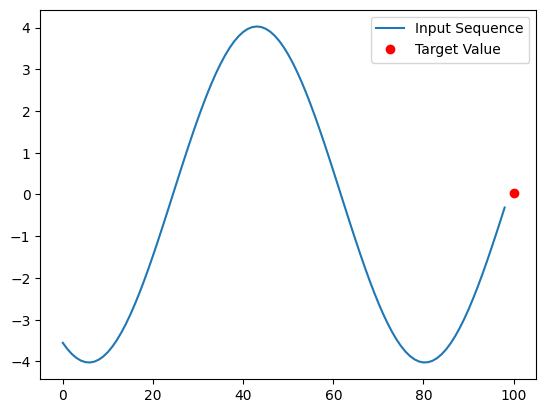

In [13]:
# Generate Sinusoidal Wave Dataset

def generate_sine_wave_data(num_samples, num_timesteps, freq_range, amp_range):
    """
    Generate sine wave data with varying frequencies, amplitudes, and random phase shifts.
    The last value in each sequence is used as the target prediction.

    Parameters:
    - num_samples: Number of samples to generate.
    - num_timesteps: Number of timesteps for each sample.
    - freq_range: Tuple of floor and ceiling of frequency range.
    - amp_range: Tuple of floor and ceiling of amplitude range.

    Returns:
    - X: Generated sine wave data of shape (num_samples, num_timesteps - 1).
    - y: Target values of shape (num_samples,).
    """
    X = np.zeros((num_samples, num_timesteps - 1))
    y = np.zeros(num_samples)
    for i in range(num_samples):
        ### START CODE HERE ###
        # Choose the frequency, amplitude and shift phase value.
        # freq = None             # Random choose from freq_range.
        # amp = None              # Random choose from amp_range.
        # phase_shift = None      # Random choose from (0, 2*pi).
        # Choose the frequency, amplitude and shift phase value.
        freq = np.random.uniform(freq_range[0], freq_range[1])  # Random choose from freq_range.
        amp = np.random.uniform(amp_range[0], amp_range[1])   # Random choose from amp_range.
        phase_shift = np.random.uniform(0, 2 * np.pi)         # Random choose from (0, 2*pi).
        ### END CODE HERE ###

        t = np.linspace(0, 2 * np.pi, num_timesteps)
        sine_wave = amp * np.sin(freq * t + phase_shift)
        X[i] = sine_wave[:-1]  # All but the last value
        y[i] = sine_wave[-1]   # The last value
    return X, y

### START CODE HERE ###
# You can modify to your preferred range and number of samples. (Note: It's recommended to cover the range of testing data mentioned above.)
num_samples = 1600
num_timesteps = 100
freq_range = (0.5, 10.0)  # Frequency range
amp_range = (0.5, 10.0)   # Amplitude range
### END CODE HERE ###

X, y = generate_sine_wave_data(num_samples, num_timesteps, freq_range, amp_range)

### START CODE HERE ###
# Split data into training and validation sets
# None
def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    train_indices = indices[:split_idx]
    test_indices = indices[split_idx:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
### END CODE HERE ###

# Plot an example sequence
plt.plot(X_train[0], label='Input Sequence')
plt.plot(np.arange(num_timesteps, num_timesteps + 1), y_train[0], 'ro', label='Target Value')
plt.legend()
plt.show()


### Construct the model with Dense layer only
Here, we want you to construct the model with **Dense layer only** like you did in Lab4. You may modify the model structure and parameters in the way you like.

Epoch 1/60: 320batch [00:00, 381.98batch/s, loss=6.07]


Epoch 1/60, Training Loss: 6.072967127800971
Epoch 1/60, Validation Loss: 2.06298933791645


Epoch 2/60: 320batch [00:00, 433.72batch/s, loss=1.45]


Epoch 2/60, Training Loss: 1.4489931682718178
Epoch 2/60, Validation Loss: 1.4454613179170315


Epoch 3/60: 320batch [00:01, 306.41batch/s, loss=0.94]


Epoch 3/60, Training Loss: 0.9398329909914891
Epoch 3/60, Validation Loss: 1.1415012642487843


Epoch 4/60: 320batch [00:00, 429.29batch/s, loss=0.714]


Epoch 4/60, Training Loss: 0.7135002264792307
Epoch 4/60, Validation Loss: 0.9459948403267031


Epoch 5/60: 320batch [00:00, 326.13batch/s, loss=0.57]


Epoch 5/60, Training Loss: 0.5704849280026584
Epoch 5/60, Validation Loss: 0.8127640591943841


Epoch 6/60: 320batch [00:00, 508.52batch/s, loss=0.471]


Epoch 6/60, Training Loss: 0.4709310749008707
Epoch 6/60, Validation Loss: 0.7154627737655961


Epoch 7/60: 320batch [00:01, 283.02batch/s, loss=0.399]


Epoch 7/60, Training Loss: 0.3988647918769223
Epoch 7/60, Validation Loss: 0.641321384637841


Epoch 8/60: 320batch [00:01, 247.67batch/s, loss=0.345]


Epoch 8/60, Training Loss: 0.3451900107789218
Epoch 8/60, Validation Loss: 0.5837517224100965


Epoch 9/60: 320batch [00:01, 267.72batch/s, loss=0.303]


Epoch 9/60, Training Loss: 0.3026921996658143
Epoch 9/60, Validation Loss: 0.5361841233862565


Epoch 10/60: 320batch [00:01, 243.35batch/s, loss=0.269]


Epoch 10/60, Training Loss: 0.2688281732780262
Epoch 10/60, Validation Loss: 0.4988225083697569


Epoch 11/60: 320batch [00:01, 243.93batch/s, loss=0.241]


Epoch 11/60, Training Loss: 0.2413942052520321
Epoch 11/60, Validation Loss: 0.4674569577967274


Epoch 12/60: 320batch [00:01, 267.40batch/s, loss=0.218]


Epoch 12/60, Training Loss: 0.21834158497086728
Epoch 12/60, Validation Loss: 0.4406446548940026


Epoch 13/60: 320batch [00:01, 311.35batch/s, loss=0.199]


Epoch 13/60, Training Loss: 0.19864780408224736
Epoch 13/60, Validation Loss: 0.4167572375960738


Epoch 14/60: 320batch [00:00, 444.90batch/s, loss=0.182]


Epoch 14/60, Training Loss: 0.1817033239590672
Epoch 14/60, Validation Loss: 0.39526730987649467


Epoch 15/60: 320batch [00:00, 376.86batch/s, loss=0.167]


Epoch 15/60, Training Loss: 0.16654827173226983
Epoch 15/60, Validation Loss: 0.37694450060690965


Epoch 16/60: 320batch [00:00, 322.14batch/s, loss=0.153]


Epoch 16/60, Training Loss: 0.15328122714606257
Epoch 16/60, Validation Loss: 0.35924195683228394


Epoch 17/60: 320batch [00:00, 417.35batch/s, loss=0.142]


Epoch 17/60, Training Loss: 0.14166567258497115
Epoch 17/60, Validation Loss: 0.34394121306656356


Epoch 18/60: 320batch [00:00, 342.37batch/s, loss=0.132]


Epoch 18/60, Training Loss: 0.13165475318918235
Epoch 18/60, Validation Loss: 0.3298197530309289


Epoch 19/60: 320batch [00:00, 501.55batch/s, loss=0.122]


Epoch 19/60, Training Loss: 0.12217234941215416
Epoch 19/60, Validation Loss: 0.31696558825373344


Epoch 20/60: 320batch [00:01, 307.08batch/s, loss=0.114]


Epoch 20/60, Training Loss: 0.1140926896566464
Epoch 20/60, Validation Loss: 0.3056056678964011


Epoch 21/60: 320batch [00:00, 356.52batch/s, loss=0.107]


Epoch 21/60, Training Loss: 0.10660292215852059
Epoch 21/60, Validation Loss: 0.2939000121205032


Epoch 22/60: 320batch [00:00, 381.19batch/s, loss=0.0998]


Epoch 22/60, Training Loss: 0.09977219558072074
Epoch 22/60, Validation Loss: 0.28396219878420076


Epoch 23/60: 320batch [00:00, 368.89batch/s, loss=0.0937]


Epoch 23/60, Training Loss: 0.09370318976842254
Epoch 23/60, Validation Loss: 0.2749752756049455


Epoch 24/60: 320batch [00:01, 257.52batch/s, loss=0.088]


Epoch 24/60, Training Loss: 0.08799784335199343
Epoch 24/60, Validation Loss: 0.2667740858353122


Epoch 25/60: 320batch [00:01, 245.75batch/s, loss=0.0829]


Epoch 25/60, Training Loss: 0.08289348998196808
Epoch 25/60, Validation Loss: 0.259040045351148


Epoch 26/60: 320batch [00:01, 199.01batch/s, loss=0.0782]


Epoch 26/60, Training Loss: 0.07821394198618341
Epoch 26/60, Validation Loss: 0.25138347022618074


Epoch 27/60: 320batch [00:01, 288.37batch/s, loss=0.0739]


Epoch 27/60, Training Loss: 0.07394916128945463
Epoch 27/60, Validation Loss: 0.24454686360191139


Epoch 28/60: 320batch [00:00, 365.27batch/s, loss=0.0701]


Epoch 28/60, Training Loss: 0.07013277977766606
Epoch 28/60, Validation Loss: 0.2377319803723789


Epoch 29/60: 320batch [00:00, 372.03batch/s, loss=0.0665]


Epoch 29/60, Training Loss: 0.06651808635383061
Epoch 29/60, Validation Loss: 0.23203066925913332


Epoch 30/60: 320batch [00:00, 329.89batch/s, loss=0.0632]


Epoch 30/60, Training Loss: 0.0631836384076104
Epoch 30/60, Validation Loss: 0.22637228685662125


Epoch 31/60: 320batch [00:00, 410.02batch/s, loss=0.0602]


Epoch 31/60, Training Loss: 0.060196235118657994
Epoch 31/60, Validation Loss: 0.22077621590598218


Epoch 32/60: 320batch [00:00, 407.05batch/s, loss=0.0574]


Epoch 32/60, Training Loss: 0.057395353936699756
Epoch 32/60, Validation Loss: 0.2153129066421463


Epoch 33/60: 320batch [00:00, 366.76batch/s, loss=0.0548]


Epoch 33/60, Training Loss: 0.054779653675304664
Epoch 33/60, Validation Loss: 0.2106339518186513


Epoch 34/60: 320batch [00:00, 466.86batch/s, loss=0.0524]


Epoch 34/60, Training Loss: 0.05235483510058455
Epoch 34/60, Validation Loss: 0.20588683888473427


Epoch 35/60: 320batch [00:01, 281.18batch/s, loss=0.0502]


Epoch 35/60, Training Loss: 0.050168071023558636
Epoch 35/60, Validation Loss: 0.2016737177773026


Epoch 36/60: 320batch [00:00, 375.94batch/s, loss=0.0481]


Epoch 36/60, Training Loss: 0.04809570882848805
Epoch 36/60, Validation Loss: 0.1973021658509108


Epoch 37/60: 320batch [00:00, 336.01batch/s, loss=0.0462]


Epoch 37/60, Training Loss: 0.04618400587527385
Epoch 37/60, Validation Loss: 0.19321464153855938


Epoch 38/60: 320batch [00:00, 374.65batch/s, loss=0.0444]


Epoch 38/60, Training Loss: 0.044401552239440895
Epoch 38/60, Validation Loss: 0.18954493100814906


Epoch 39/60: 320batch [00:01, 216.52batch/s, loss=0.0428]


Epoch 39/60, Training Loss: 0.042781150970691115
Epoch 39/60, Validation Loss: 0.18603617663968677


Epoch 40/60: 320batch [00:01, 247.64batch/s, loss=0.0413]


Epoch 40/60, Training Loss: 0.041251078090234185
Epoch 40/60, Validation Loss: 0.18283207492209808


Epoch 41/60: 320batch [00:01, 252.90batch/s, loss=0.0398]


Epoch 41/60, Training Loss: 0.03981207401602273
Epoch 41/60, Validation Loss: 0.17958602461196876


Epoch 42/60: 320batch [00:01, 220.48batch/s, loss=0.0385]


Epoch 42/60, Training Loss: 0.038512367258049976
Epoch 42/60, Validation Loss: 0.17648854802834948


Epoch 43/60: 320batch [00:01, 315.86batch/s, loss=0.0373]


Epoch 43/60, Training Loss: 0.03729143900710893
Epoch 43/60, Validation Loss: 0.17392686691047848


Epoch 44/60: 320batch [00:00, 336.75batch/s, loss=0.0361]


Epoch 44/60, Training Loss: 0.03610357593125565
Epoch 44/60, Validation Loss: 0.17124895979878219


Epoch 45/60: 320batch [00:00, 384.84batch/s, loss=0.035]


Epoch 45/60, Training Loss: 0.03502100997622874
Epoch 45/60, Validation Loss: 0.16854686238865116


Epoch 46/60: 320batch [00:00, 362.03batch/s, loss=0.034]


Epoch 46/60, Training Loss: 0.03400926713955222
Epoch 46/60, Validation Loss: 0.16619879125202053


Epoch 47/60: 320batch [00:00, 434.07batch/s, loss=0.0331]


Epoch 47/60, Training Loss: 0.033060191613714346
Epoch 47/60, Validation Loss: 0.16387177677459397


Epoch 48/60: 320batch [00:01, 291.87batch/s, loss=0.0321]


Epoch 48/60, Training Loss: 0.032140905366383164
Epoch 48/60, Validation Loss: 0.16153917856737454


Epoch 49/60: 320batch [00:00, 477.14batch/s, loss=0.0313]


Epoch 49/60, Training Loss: 0.03131612504792001
Epoch 49/60, Validation Loss: 0.1594219740002885


Epoch 50/60: 320batch [00:00, 353.85batch/s, loss=0.0305]


Epoch 50/60, Training Loss: 0.03048821862270998
Epoch 50/60, Validation Loss: 0.157184581897666


Epoch 51/60: 320batch [00:00, 392.43batch/s, loss=0.0297]


Epoch 51/60, Training Loss: 0.029745775322763356
Epoch 51/60, Validation Loss: 0.15527307675980892


Epoch 52/60: 320batch [00:00, 406.59batch/s, loss=0.029]


Epoch 52/60, Training Loss: 0.029016360242346145
Epoch 52/60, Validation Loss: 0.15350211285342236


Epoch 53/60: 320batch [00:00, 353.96batch/s, loss=0.0283]


Epoch 53/60, Training Loss: 0.028325072335719365
Epoch 53/60, Validation Loss: 0.15158792741712818


Epoch 54/60: 320batch [00:00, 482.39batch/s, loss=0.0277]


Epoch 54/60, Training Loss: 0.027675704563550736
Epoch 54/60, Validation Loss: 0.14994909817886812


Epoch 55/60: 320batch [00:01, 242.89batch/s, loss=0.027]


Epoch 55/60, Training Loss: 0.027045330305435784
Epoch 55/60, Validation Loss: 0.14810444926976316


Epoch 56/60: 320batch [00:01, 278.36batch/s, loss=0.0265]


Epoch 56/60, Training Loss: 0.026483773800750197
Epoch 56/60, Validation Loss: 0.146438933752882


Epoch 57/60: 320batch [00:01, 270.24batch/s, loss=0.0259]


Epoch 57/60, Training Loss: 0.025912166110197914
Epoch 57/60, Validation Loss: 0.14505402966079328


Epoch 58/60: 320batch [00:01, 251.61batch/s, loss=0.0254]


Epoch 58/60, Training Loss: 0.02539437963952282
Epoch 58/60, Validation Loss: 0.14332064675420228


Epoch 59/60: 320batch [00:01, 270.19batch/s, loss=0.0249]


Epoch 59/60, Training Loss: 0.02488174609802898
Epoch 59/60, Validation Loss: 0.14179843040691412


Epoch 60/60: 320batch [00:00, 415.71batch/s, loss=0.0244]


Epoch 60/60, Training Loss: 0.024393029104990204
Epoch 60/60, Validation Loss: 0.14047059474235296


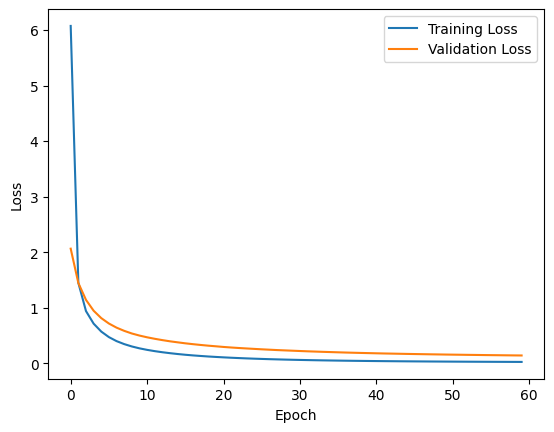

In [30]:
### START CODE HERE ###
# Change the structure and parameters to train your own model (Only contain Dense layer here!!!)
# Reshape the input data to fit Dense model
input_size = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1])
y_val = y_val.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
# Construct the model with Dense layers

model = Model()
model.add(Dense(input_size, 1024))
model.add(Activation("relu", None))
model.add(Flatten())  # Flatten the output of the last pooling layer
model.add(Dense(1024, 1))
model.add(Activation("linear", None))

# Train the model
model.train(X_train, y_train, X_val, y_val, epochs=60, learning_rate=0.001, batch_size = 8, loss_function='mse')
### END CODE HERE ###

# Plot the training and validation losses
model.plot_losses()

#### Predict testing data & Save the answer (For Dense model)
For this prediction of Dense model, you can choose not to submit it to Kaggle if its performance is not better.

In [31]:
### START CODE HERE ###
# Read the X_test.csv file into a DataFrame
# Change the path if needed
# download
X_test_df = pd.read_csv('X_test.csv')
### END CODE HERE ###

# Do not modify this part to get the correct output format!!
# Drop the 'Id' column if it exists
if 'Id' in X_test_df.columns:
    X_test_df = X_test_df.drop(columns=['Id'])

# Convert the DataFrame to a numpy array
X_test = X_test_df.values
y_pred = model.predict(X_test)


# Convert the list of predictions to a numpy array
y_pred = np.array(y_pred)
y_pred_df = pd.DataFrame(y_pred, columns=['answer'])
y_pred_df.insert(0, 'Id', range(1, 1 + len(y_pred_df)))
y_pred_df.to_csv('y_pred_basic.csv', index=False)

print('Prediction data has been saved.')

Prediction data has been saved.


### Construct the model with RNN layer
Then, we can integrate our custom-built RNN layer into the model to evaluate whether it improves performance on the sequential inputs.

Epoch 1/50: 160batch [00:02, 54.05batch/s, loss=15.2]


Epoch 1/50, Training Loss: 15.21129008240167
Epoch 1/50, Validation Loss: 13.637984997909639


Epoch 2/50: 160batch [00:01, 80.22batch/s, loss=8.63]


Epoch 2/50, Training Loss: 8.633252923637437
Epoch 2/50, Validation Loss: 5.403651672966416


Epoch 3/50: 160batch [00:01, 82.97batch/s, loss=3.82]


Epoch 3/50, Training Loss: 3.8189620212788284
Epoch 3/50, Validation Loss: 3.2394484316981833


Epoch 4/50: 160batch [00:01, 84.35batch/s, loss=2.77]


Epoch 4/50, Training Loss: 2.7705290731304504
Epoch 4/50, Validation Loss: 2.5820499678073863


Epoch 5/50: 160batch [00:01, 81.08batch/s, loss=2.27]


Epoch 5/50, Training Loss: 2.273515187256586
Epoch 5/50, Validation Loss: 2.1602784875279073


Epoch 6/50: 160batch [00:03, 47.29batch/s, loss=1.92]


Epoch 6/50, Training Loss: 1.9201647940881668
Epoch 6/50, Validation Loss: 1.8479661404746914


Epoch 7/50: 160batch [00:01, 86.36batch/s, loss=1.65]


Epoch 7/50, Training Loss: 1.6463503510829738
Epoch 7/50, Validation Loss: 1.5982645126922046


Epoch 8/50: 160batch [00:01, 85.58batch/s, loss=1.42]


Epoch 8/50, Training Loss: 1.4208586119017066
Epoch 8/50, Validation Loss: 1.3849868015826106


Epoch 9/50: 160batch [00:01, 81.64batch/s, loss=1.22]


Epoch 9/50, Training Loss: 1.224964145054496
Epoch 9/50, Validation Loss: 1.1958804094120798


Epoch 10/50: 160batch [00:01, 82.36batch/s, loss=1.05]


Epoch 10/50, Training Loss: 1.0485976673799386
Epoch 10/50, Validation Loss: 1.0248543598618127


Epoch 11/50: 160batch [00:02, 66.54batch/s, loss=0.888]


Epoch 11/50, Training Loss: 0.8876895311719573
Epoch 11/50, Validation Loss: 0.8684282751736186


Epoch 12/50: 160batch [00:03, 51.19batch/s, loss=0.741]


Epoch 12/50, Training Loss: 0.7411257570574523
Epoch 12/50, Validation Loss: 0.7269121984374007


Epoch 13/50: 160batch [00:01, 80.95batch/s, loss=0.61]


Epoch 13/50, Training Loss: 0.61036709211552
Epoch 13/50, Validation Loss: 0.6023793361728469


Epoch 14/50: 160batch [00:02, 79.64batch/s, loss=0.498]


Epoch 14/50, Training Loss: 0.4979171464970105
Epoch 14/50, Validation Loss: 0.4975538290549164


Epoch 15/50: 160batch [00:01, 87.79batch/s, loss=0.407]


Epoch 15/50, Training Loss: 0.40667927560793216
Epoch 15/50, Validation Loss: 0.41421746655664454


Epoch 16/50: 160batch [00:01, 81.40batch/s, loss=0.337]


Epoch 16/50, Training Loss: 0.33655045035784414
Epoch 16/50, Validation Loss: 0.3515602414039276


Epoch 17/50: 160batch [00:03, 44.36batch/s, loss=0.285]


Epoch 17/50, Training Loss: 0.2854010478551102
Epoch 17/50, Validation Loss: 0.30668328562197156


Epoch 18/50: 160batch [00:03, 45.42batch/s, loss=0.25]


Epoch 18/50, Training Loss: 0.2497132846822605
Epoch 18/50, Validation Loss: 0.27550152585830323


Epoch 19/50: 160batch [00:01, 82.20batch/s, loss=0.225]


Epoch 19/50, Training Loss: 0.2253166136349128
Epoch 19/50, Validation Loss: 0.2539935544308811


Epoch 20/50: 160batch [00:02, 79.02batch/s, loss=0.209]


Epoch 20/50, Training Loss: 0.2085637071919641
Epoch 20/50, Validation Loss: 0.23880347681512082


Epoch 21/50: 160batch [00:01, 80.70batch/s, loss=0.197]


Epoch 21/50, Training Loss: 0.19663550657450968
Epoch 21/50, Validation Loss: 0.22759000473004762


Epoch 22/50: 160batch [00:01, 83.29batch/s, loss=0.188]


Epoch 22/50, Training Loss: 0.18765788281446155
Epoch 22/50, Validation Loss: 0.21886744960374704


Epoch 23/50: 160batch [00:02, 65.65batch/s, loss=0.18]


Epoch 23/50, Training Loss: 0.18046927531029575
Epoch 23/50, Validation Loss: 0.21171030569341107


Epoch 24/50: 160batch [00:03, 52.03batch/s, loss=0.174]


Epoch 24/50, Training Loss: 0.1744242590565049
Epoch 24/50, Validation Loss: 0.20557374663397723


Epoch 25/50: 160batch [00:01, 82.28batch/s, loss=0.169]


Epoch 25/50, Training Loss: 0.16912012716036026
Epoch 25/50, Validation Loss: 0.20011509864194138


Epoch 26/50: 160batch [00:01, 84.53batch/s, loss=0.164]


Epoch 26/50, Training Loss: 0.16432454819136874
Epoch 26/50, Validation Loss: 0.1951901764594712


Epoch 27/50: 160batch [00:01, 83.83batch/s, loss=0.16]


Epoch 27/50, Training Loss: 0.159931620267687
Epoch 27/50, Validation Loss: 0.19066196508498187


Epoch 28/50: 160batch [00:01, 81.76batch/s, loss=0.156]


Epoch 28/50, Training Loss: 0.1558567358974002
Epoch 28/50, Validation Loss: 0.18647193600902723


Epoch 29/50: 160batch [00:02, 60.43batch/s, loss=0.152]


Epoch 29/50, Training Loss: 0.15205036198955507
Epoch 29/50, Validation Loss: 0.1825769960557187


Epoch 30/50: 160batch [00:02, 57.74batch/s, loss=0.148]


Epoch 30/50, Training Loss: 0.14847980068867347
Epoch 30/50, Validation Loss: 0.17891941188982236


Epoch 31/50: 160batch [00:01, 81.73batch/s, loss=0.145]


Epoch 31/50, Training Loss: 0.14512270476043604
Epoch 31/50, Validation Loss: 0.17548121753951804


Epoch 32/50: 160batch [00:01, 80.91batch/s, loss=0.142]


Epoch 32/50, Training Loss: 0.14196114769837725
Epoch 32/50, Validation Loss: 0.1722381656180006


Epoch 33/50: 160batch [00:02, 79.65batch/s, loss=0.139]


Epoch 33/50, Training Loss: 0.1389707002924652
Epoch 33/50, Validation Loss: 0.1691794278023906


Epoch 34/50: 160batch [00:01, 85.92batch/s, loss=0.136]


Epoch 34/50, Training Loss: 0.13613757946999677
Epoch 34/50, Validation Loss: 0.16627261204371763


Epoch 35/50: 160batch [00:03, 52.79batch/s, loss=0.133]


Epoch 35/50, Training Loss: 0.13344649236247025
Epoch 35/50, Validation Loss: 0.16352178151555685


Epoch 36/50: 160batch [00:02, 63.91batch/s, loss=0.131]


Epoch 36/50, Training Loss: 0.13089336635847648
Epoch 36/50, Validation Loss: 0.16090218190399525


Epoch 37/50: 160batch [00:01, 80.86batch/s, loss=0.128]


Epoch 37/50, Training Loss: 0.1284580085293941
Epoch 37/50, Validation Loss: 0.15840204095578764


Epoch 38/50: 160batch [00:01, 81.27batch/s, loss=0.126]


Epoch 38/50, Training Loss: 0.12612976875357323
Epoch 38/50, Validation Loss: 0.1560252667479227


Epoch 39/50: 160batch [00:02, 78.54batch/s, loss=0.124]


Epoch 39/50, Training Loss: 0.12390848471531109
Epoch 39/50, Validation Loss: 0.15374696848695324


Epoch 40/50: 160batch [00:02, 77.35batch/s, loss=0.122]


Epoch 40/50, Training Loss: 0.1217766278832424
Epoch 40/50, Validation Loss: 0.15155579926970686


Epoch 41/50: 160batch [00:03, 48.83batch/s, loss=0.12]


Epoch 41/50, Training Loss: 0.11973470289582906
Epoch 41/50, Validation Loss: 0.14945757135569065


Epoch 42/50: 160batch [00:02, 78.78batch/s, loss=0.118]


Epoch 42/50, Training Loss: 0.11777710808908848
Epoch 42/50, Validation Loss: 0.1474442266552228


Epoch 43/50: 160batch [00:02, 73.03batch/s, loss=0.116]


Epoch 43/50, Training Loss: 0.11589746206949787
Epoch 43/50, Validation Loss: 0.14550365310292618


Epoch 44/50: 160batch [00:01, 81.92batch/s, loss=0.114]


Epoch 44/50, Training Loss: 0.1140891445342648
Epoch 44/50, Validation Loss: 0.14363332049990823


Epoch 45/50: 160batch [00:02, 75.47batch/s, loss=0.112]


Epoch 45/50, Training Loss: 0.11234914535758318
Epoch 45/50, Validation Loss: 0.1418308831811228


Epoch 46/50: 160batch [00:02, 56.72batch/s, loss=0.111]


Epoch 46/50, Training Loss: 0.11067422516067864
Epoch 46/50, Validation Loss: 0.14008832362323492


Epoch 47/50: 160batch [00:02, 58.51batch/s, loss=0.109]


Epoch 47/50, Training Loss: 0.10905952136593919
Epoch 47/50, Validation Loss: 0.13840465506533792


Epoch 48/50: 160batch [00:01, 84.44batch/s, loss=0.108]


Epoch 48/50, Training Loss: 0.10750214024871138
Epoch 48/50, Validation Loss: 0.13677632202004866


Epoch 49/50: 160batch [00:01, 84.68batch/s, loss=0.106]


Epoch 49/50, Training Loss: 0.10599450251570541
Epoch 49/50, Validation Loss: 0.13519627194088565


Epoch 50/50: 160batch [00:01, 82.95batch/s, loss=0.105]


Epoch 50/50, Training Loss: 0.10453245617806843
Epoch 50/50, Validation Loss: 0.13366720590444012


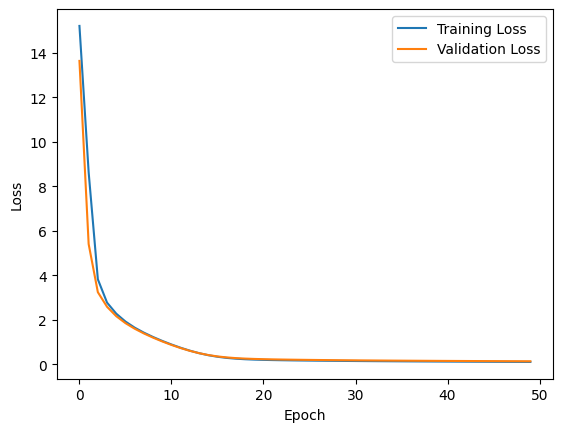

In [32]:
### START CODE HERE ###
# Change the structure and parameters to train your own model (Can add RNN layer here)
# Reshape X_train and X_val to fit the RNN layer input shape.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
y_val = y_val.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# Construct the model & Set the parameters.
input_size = 1  # Number of input features (1 for single sine wave value)
rnn_units = 32  # Number of units in the RNN layer
dense_units = 16  # Number of units in the Dense layer
output_size = 1  # Number of output classes (1 for single sine wave value)

# model = Model()
# model.add(None)
model = Model()
model.add(RNN(1, 64))  # Add an RNN layer
model.add(Dense(64, 784))  # Add a Dense layer after RNN
model.add(Activation("relu", None))
model.add(Flatten())  # Flatten the output of the last pooling layer
model.add(Dense(784, 1))  # Add a final Dense layer for output
model.add(Activation("linear", None))
...

# Train the model
model.train(X_train, y_train, X_val, y_val, epochs=50, learning_rate=0.001, batch_size = 16, loss_function='mse')
### END CODE HERE ###

# Plot the training and validation losses
model.plot_losses()

#### Predict testing data & Save the answer (For RNN model)
Remember to submit your prediction to Kaggle!

In [33]:
### START CODE HERE ###
# Read the X_test.csv file into a DataFrame
# Change the path if needed
X_test_df = pd.read_csv('X_test.csv')
### END CODE HERE ###


# Do not modify this part to get the correct output format!!
# Drop the 'Id' column if it exists
if 'Id' in X_test_df.columns:
    X_test_df = X_test_df.drop(columns=['Id'])

# Convert the DataFrame to a numpy array
X_test = X_test_df.values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # reshape the X_test to fit RNN layer input shape.
y_pred = model.predict(X_test)


# Convert the list of predictions to a numpy array
y_pred = np.array(y_pred)
y_pred_df = pd.DataFrame(y_pred, columns=['answer'])
y_pred_df.insert(0, 'Id', range(1, 1 + len(y_pred_df)))
y_pred_df.to_csv('y_pred_basic2.csv', index=False)

print('Prediction data has been saved.')

Prediction data has been saved.


# Advance part (35%)






## Accelerometer and Gyroscope dataset
- ⚠⚠ You need to download the training & testing data from Kaggle. ⚠⚠ (Put it into the directory name `Activity data`, or your need to change the path in template.)
- In this dataset, we provide the time-series Accelerometer and Gyroscope data each with 3-axial (x, y, z) (total 6 channels).
- We classified the activity into 3 different classes:
    Activity 1, 2, 3\
    You have to build a RNN model using these time-series data to predict the activity class.
- Steps:
    1. Load the provided `X_train.npy`, `y_train.npy` and `X_test.npy` and split the part of training data to validation.\
    Note: `y_train.npy` is already one-hot encoded.
    2. Visualize the `X_train.npy`.
    3. One-hot encode the `y_train.npy` for three classes: Activity 1, Activity 2, Activity 3.
    4. Build your own RNN model and train it.
    5. Predict with the `X_test.npy` and generate `y_test.csv` then **submit it to Kaggle**!
- We have set 3 baselines on public score:
    * Accuracy >= 0.65 -> 10 points
    * Accuracy >= 0.7  -> 20 points
    * Accuracy >= 0.75 -> 25 points
- Kaggle link: https://www.kaggle.com/t/95e0b11f63e74566802b0dea5ec4f1b4


### 1. Load training & testing data
Load the training and testing data, then split the training data into a validation set using your preferred ratio.

In [51]:
### START CODE HERE ###
# Load X_train, y_train and X_test data
# Change the path if needed
y_train = np.load('y_train.npy')
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
### END CODE HERE ###

### START CODE HERE ###
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
# Define the validation ratio in your preferred way
validation_ratio = 0.3
# 1. One-hot encode y_train. (3 classes)
encoder = OneHotEncoder(sparse_output=False)  # 使用 sparse_output=False 確保返回的結果不是稀疏矩陣
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))


# 2. Split the X_train, y_train data into train & validation set.
# 使用指定的 validation_ratio 來分割數據集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=validation_ratio, random_state=42)

# None
# Split the data
### END CODE HERE ###



X_train shape: (7352, 128, 6)
y_train shape: (7352, 1)
X_test shape: (2947, 128, 6)


### 2. Visualize the training data

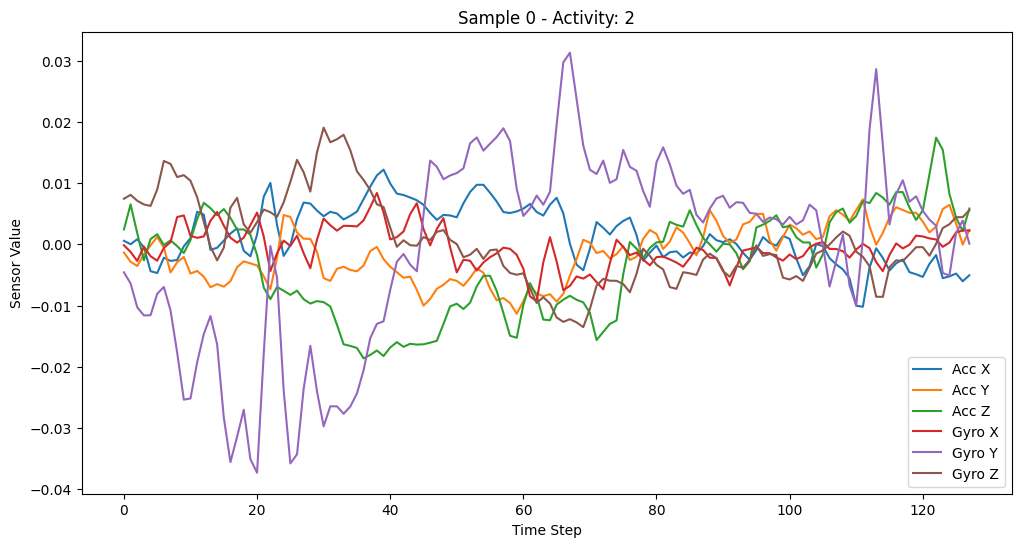

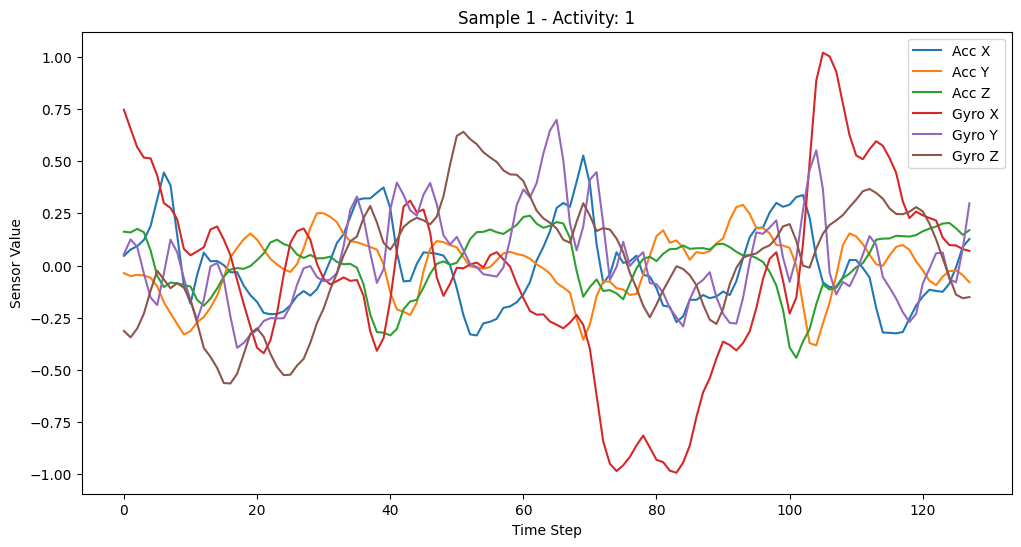

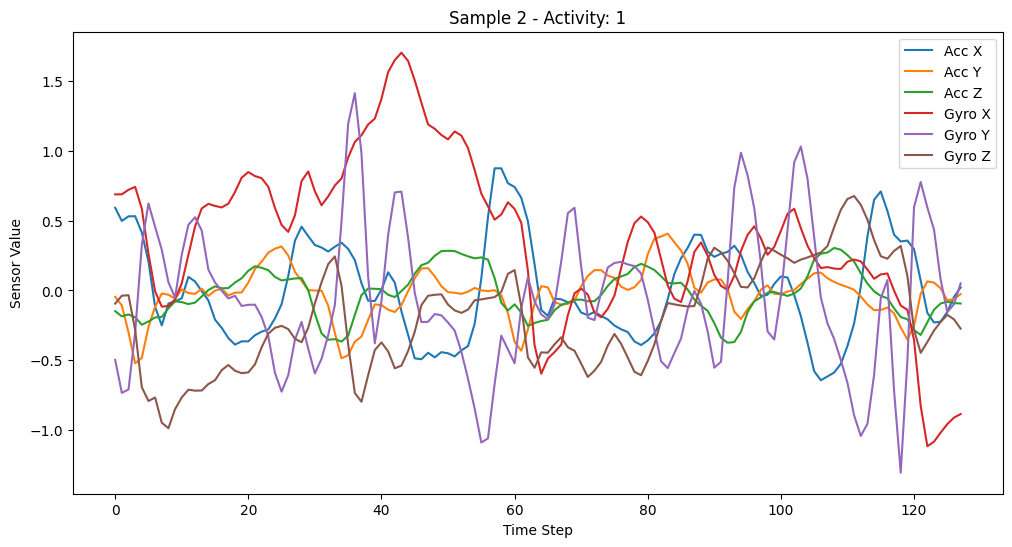

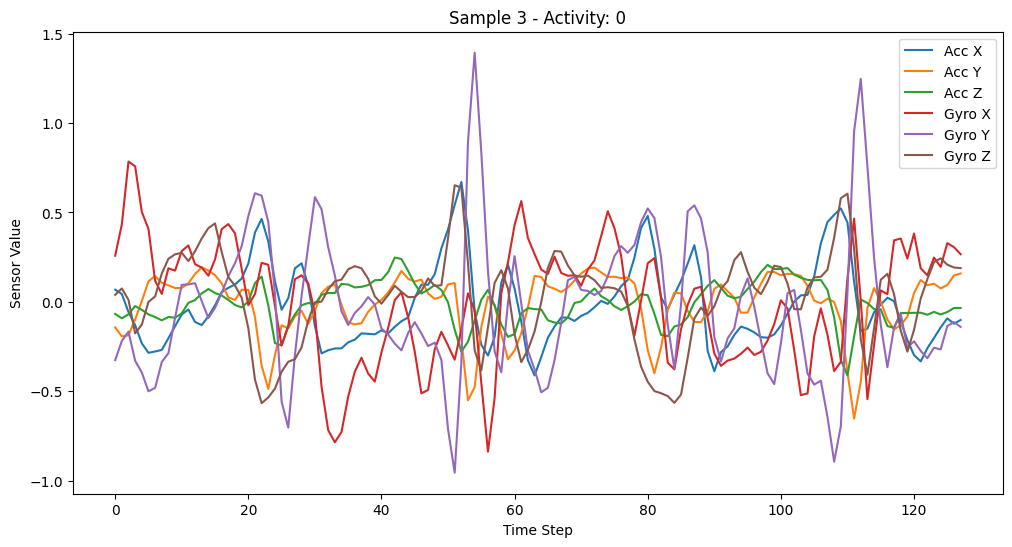

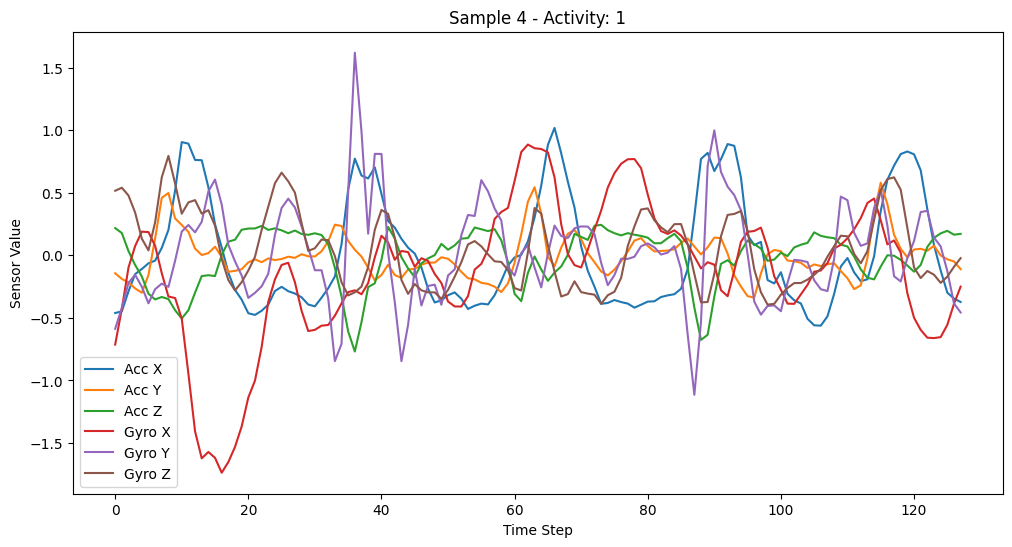

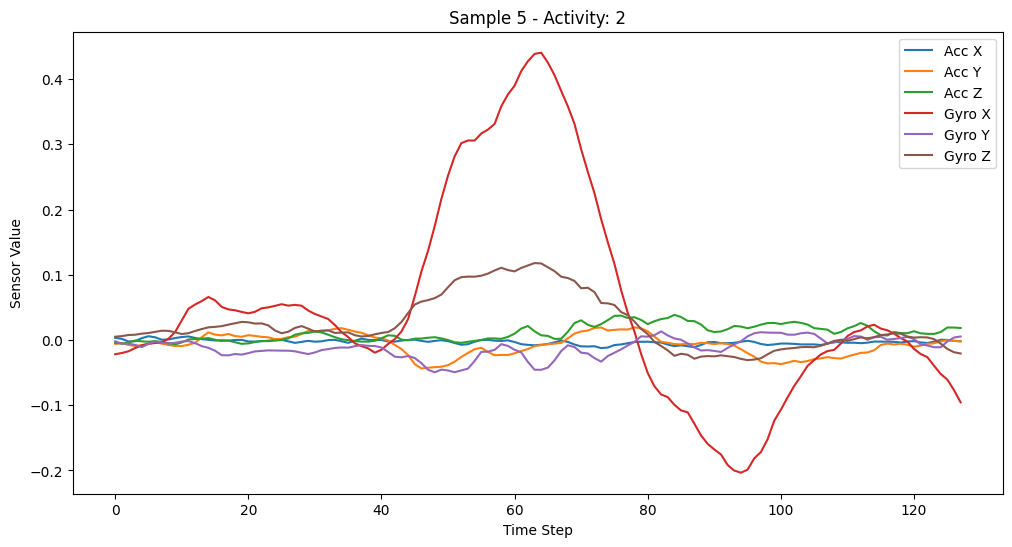

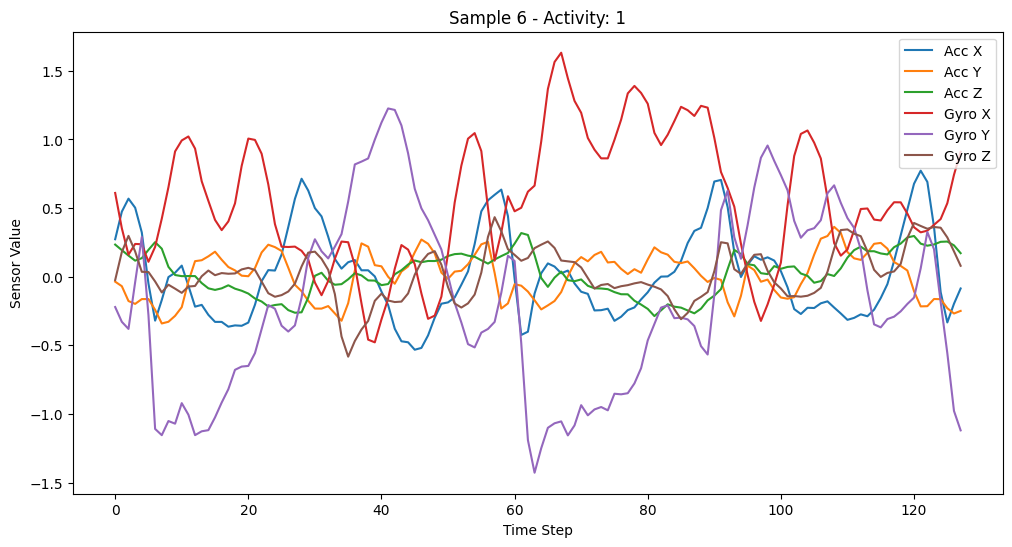

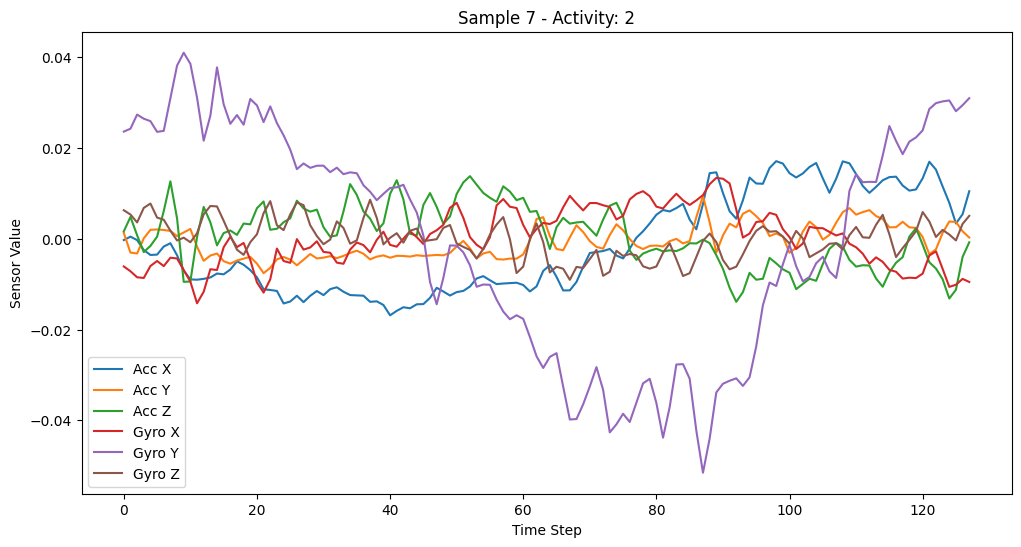

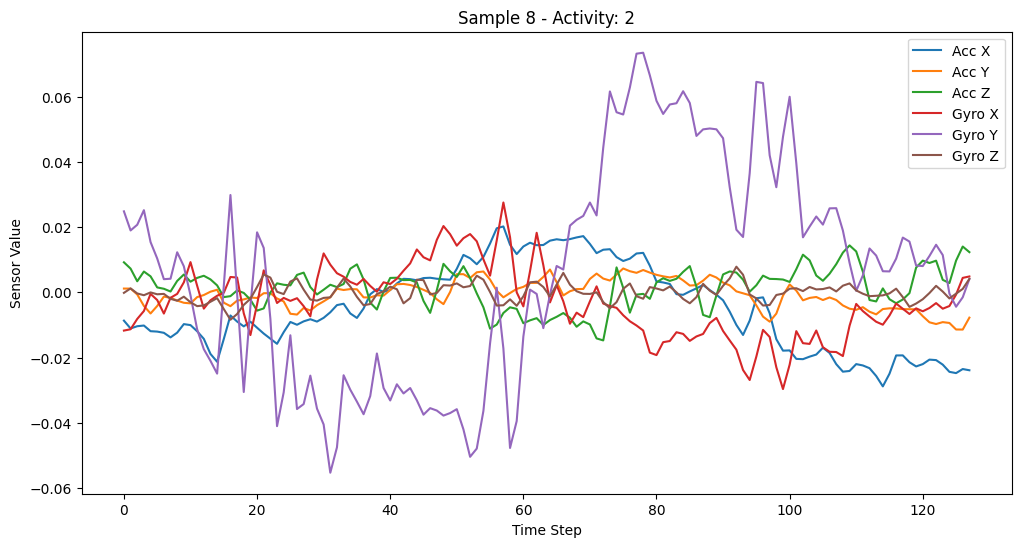

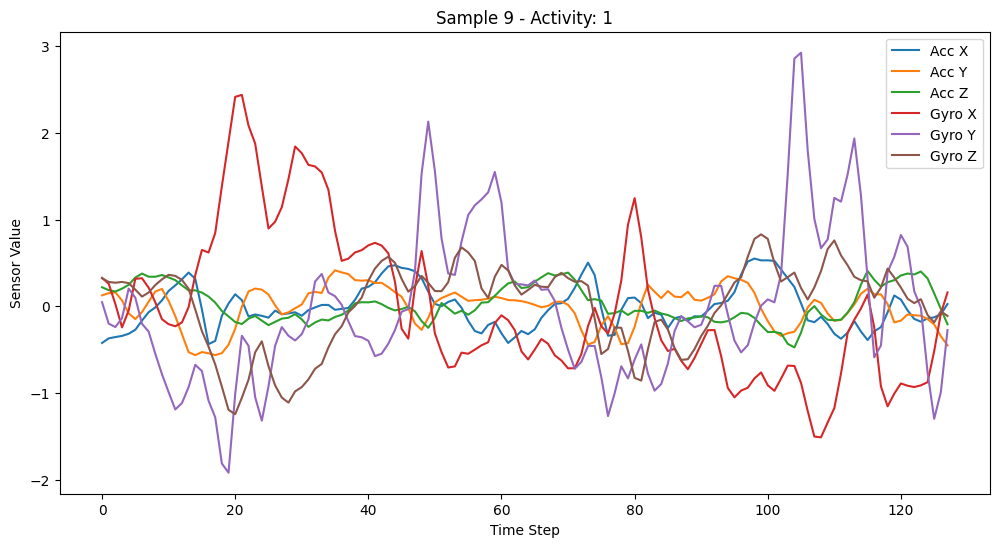

In [52]:
# Function to plot a single sample
def plot_sample(X, y, sample_index):
    plt.figure(figsize=(12, 6))
    plt.plot(X[sample_index, :, 0], label='Acc X')
    plt.plot(X[sample_index, :, 1], label='Acc Y')
    plt.plot(X[sample_index, :, 2], label='Acc Z')
    plt.plot(X[sample_index, :, 3], label='Gyro X')
    plt.plot(X[sample_index, :, 4], label='Gyro Y')
    plt.plot(X[sample_index, :, 5], label='Gyro Z')
    plt.title(f'Sample {sample_index} - Activity: {np.argmax(y[sample_index])}')
    plt.xlabel('Time Step')
    plt.ylabel('Sensor Value')
    plt.legend()
    plt.show()

### START CODE HERE ###
# Plot a few samples
for i in range(10):              # Change the range to visualize more samples
    plot_sample(X_train, y_train, i)
 ### END CODE HERE ###

### 3. Contruct and train the model

Epoch 1/50: 320batch [00:42,  7.48batch/s, loss=1.02]


Epoch 1/50, Training Loss: 1.030618692886455
Epoch 1/50, Validation Loss: 0.9830866139252374


Epoch 2/50: 320batch [00:43,  7.39batch/s, loss=0.973]


Epoch 2/50, Training Loss: 0.9797014565408022
Epoch 2/50, Validation Loss: 0.9629042887874897


Epoch 3/50: 320batch [00:44,  7.11batch/s, loss=0.961]


Epoch 3/50, Training Loss: 0.9669670463317
Epoch 3/50, Validation Loss: 0.9529611355235711


Epoch 4/50: 320batch [00:47,  6.79batch/s, loss=0.951]


Epoch 4/50, Training Loss: 0.9570133215750152
Epoch 4/50, Validation Loss: 0.9420409327590369


Epoch 5/50: 320batch [00:46,  6.95batch/s, loss=0.938]


Epoch 5/50, Training Loss: 0.9445345340637177
Epoch 5/50, Validation Loss: 0.9274364199906489


Epoch 6/50: 320batch [00:42,  7.50batch/s, loss=0.921]


Epoch 6/50, Training Loss: 0.9271932123993117
Epoch 6/50, Validation Loss: 0.9065812640785632


Epoch 7/50: 320batch [00:43,  7.40batch/s, loss=0.896]


Epoch 7/50, Training Loss: 0.9016133972233
Epoch 7/50, Validation Loss: 0.874509601293723


Epoch 8/50: 320batch [00:43,  7.36batch/s, loss=0.855]


Epoch 8/50, Training Loss: 0.8604137706822776
Epoch 8/50, Validation Loss: 0.8197775638643761


Epoch 9/50: 320batch [00:45,  7.02batch/s, loss=0.779]


Epoch 9/50, Training Loss: 0.7842609511850488
Epoch 9/50, Validation Loss: 0.7090167853747815


Epoch 10/50: 320batch [00:43,  7.43batch/s, loss=0.664]


Epoch 10/50, Training Loss: 0.6675297544763139
Epoch 10/50, Validation Loss: 0.6183157222329105


Epoch 11/50: 320batch [00:43,  7.37batch/s, loss=0.617]


Epoch 11/50, Training Loss: 0.6209405069891912
Epoch 11/50, Validation Loss: 0.5947419933180155


Epoch 12/50: 320batch [00:42,  7.52batch/s, loss=0.6]


Epoch 12/50, Training Loss: 0.603710565623379
Epoch 12/50, Validation Loss: 0.5834804429276044


Epoch 13/50: 320batch [00:43,  7.40batch/s, loss=0.59]


Epoch 13/50, Training Loss: 0.5931657766789102
Epoch 13/50, Validation Loss: 0.5770322949262993


Epoch 14/50: 320batch [00:43,  7.40batch/s, loss=0.582]


Epoch 14/50, Training Loss: 0.585597225123826
Epoch 14/50, Validation Loss: 0.5721924495843475


Epoch 15/50: 320batch [00:42,  7.50batch/s, loss=0.577]


Epoch 15/50, Training Loss: 0.579663710365766
Epoch 15/50, Validation Loss: 0.5680807519102758


Epoch 16/50: 320batch [00:45,  7.04batch/s, loss=0.572]


Epoch 16/50, Training Loss: 0.5745442340790314
Epoch 16/50, Validation Loss: 0.5646281978972193


Epoch 17/50: 320batch [00:42,  7.44batch/s, loss=0.567]


Epoch 17/50, Training Loss: 0.5703843561527645
Epoch 17/50, Validation Loss: 0.5616661634437592


Epoch 18/50: 320batch [00:43,  7.38batch/s, loss=0.564]


Epoch 18/50, Training Loss: 0.5668270454782103
Epoch 18/50, Validation Loss: 0.5588724328365419


Epoch 19/50: 320batch [00:42,  7.50batch/s, loss=0.561]


Epoch 19/50, Training Loss: 0.5636221860710414
Epoch 19/50, Validation Loss: 0.5560892775139056


Epoch 20/50: 320batch [00:43,  7.38batch/s, loss=0.558]


Epoch 20/50, Training Loss: 0.5604449499275865
Epoch 20/50, Validation Loss: 0.5532070042169537


Epoch 21/50: 320batch [00:42,  7.49batch/s, loss=0.554]


Epoch 21/50, Training Loss: 0.5571802100980474
Epoch 21/50, Validation Loss: 0.5502524512287766


Epoch 22/50: 320batch [00:43,  7.38batch/s, loss=0.551]


Epoch 22/50, Training Loss: 0.553816936640008
Epoch 22/50, Validation Loss: 0.547034683261884


Epoch 23/50: 320batch [00:45,  6.98batch/s, loss=0.547]


Epoch 23/50, Training Loss: 0.5500733621845322
Epoch 23/50, Validation Loss: 0.5435294932433942


Epoch 24/50: 320batch [00:42,  7.45batch/s, loss=0.543]


Epoch 24/50, Training Loss: 0.5458352832140203
Epoch 24/50, Validation Loss: 0.5393907148744106


Epoch 25/50: 320batch [00:43,  7.42batch/s, loss=0.538]


Epoch 25/50, Training Loss: 0.5408118388418526
Epoch 25/50, Validation Loss: 0.5341209071706043


Epoch 26/50: 320batch [00:46,  6.81batch/s, loss=0.532]


Epoch 26/50, Training Loss: 0.5344694541160793
Epoch 26/50, Validation Loss: 0.5267545296613115


Epoch 27/50: 320batch [00:43,  7.36batch/s, loss=0.523]


Epoch 27/50, Training Loss: 0.5259207865358785
Epoch 27/50, Validation Loss: 0.515154050497849


Epoch 28/50: 320batch [00:43,  7.39batch/s, loss=0.51]


Epoch 28/50, Training Loss: 0.5132858021053088
Epoch 28/50, Validation Loss: 0.4976417209871362


Epoch 29/50: 320batch [00:43,  7.34batch/s, loss=0.493]


Epoch 29/50, Training Loss: 0.4959272346713874
Epoch 29/50, Validation Loss: 0.47223427192693984


Epoch 30/50: 320batch [00:43,  7.41batch/s, loss=0.471]


Epoch 30/50, Training Loss: 0.47370079987398295
Epoch 30/50, Validation Loss: 0.4435530292109552


Epoch 31/50: 320batch [00:43,  7.40batch/s, loss=0.458]


Epoch 31/50, Training Loss: 0.4603402514419962
Epoch 31/50, Validation Loss: 0.4307917972244311


Epoch 32/50: 320batch [00:43,  7.43batch/s, loss=0.455]


Epoch 32/50, Training Loss: 0.45723496417002085
Epoch 32/50, Validation Loss: 0.42438448702235765


Epoch 33/50: 320batch [00:46,  6.85batch/s, loss=0.45]


Epoch 33/50, Training Loss: 0.45268732153688135
Epoch 33/50, Validation Loss: 0.4196249959324352


Epoch 34/50: 320batch [00:56,  5.68batch/s, loss=0.443]


Epoch 34/50, Training Loss: 0.445351356406532
Epoch 34/50, Validation Loss: 0.4162339236199094


Epoch 35/50: 320batch [00:44,  7.24batch/s, loss=0.437]


Epoch 35/50, Training Loss: 0.4397695116101336
Epoch 35/50, Validation Loss: 0.41413404629073314


Epoch 36/50: 320batch [00:44,  7.19batch/s, loss=0.435]


Epoch 36/50, Training Loss: 0.4372927825128422
Epoch 36/50, Validation Loss: 0.4110117194761818


Epoch 37/50: 320batch [00:44,  7.20batch/s, loss=0.451]


Epoch 37/50, Training Loss: 0.4541048133140989
Epoch 37/50, Validation Loss: 0.42913229042830187


Epoch 38/50: 320batch [00:44,  7.24batch/s, loss=0.429]


Epoch 38/50, Training Loss: 0.4324919049484993
Epoch 38/50, Validation Loss: 0.4140633011117174


Epoch 39/50: 320batch [00:47,  6.76batch/s, loss=0.418]


Epoch 39/50, Training Loss: 0.42123770722311066
Epoch 39/50, Validation Loss: 0.40611466211743297


Epoch 40/50: 320batch [00:43,  7.41batch/s, loss=0.41]


Epoch 40/50, Training Loss: 0.4133950140290555
Epoch 40/50, Validation Loss: 0.4008632567445604


Epoch 41/50: 320batch [00:43,  7.41batch/s, loss=0.404]


Epoch 41/50, Training Loss: 0.4072249667030766
Epoch 41/50, Validation Loss: 0.3970434883151097


Epoch 42/50: 320batch [00:43,  7.40batch/s, loss=0.398]


Epoch 42/50, Training Loss: 0.4008931716475237
Epoch 42/50, Validation Loss: 0.3898325890364924


Epoch 43/50: 320batch [00:43,  7.42batch/s, loss=0.391]


Epoch 43/50, Training Loss: 0.39343028006770187
Epoch 43/50, Validation Loss: 0.38308442697474926


Epoch 44/50: 320batch [00:42,  7.46batch/s, loss=0.388]


Epoch 44/50, Training Loss: 0.3907308637852879
Epoch 44/50, Validation Loss: 0.37868594446060455


Epoch 45/50: 320batch [00:43,  7.32batch/s, loss=0.384]


Epoch 45/50, Training Loss: 0.38650159205019696
Epoch 45/50, Validation Loss: 0.37522051764251046


Epoch 46/50: 320batch [00:47,  6.68batch/s, loss=0.38]


Epoch 46/50, Training Loss: 0.3829032093643016
Epoch 46/50, Validation Loss: 0.37264917415393184


Epoch 47/50: 320batch [00:43,  7.37batch/s, loss=0.376]


Epoch 47/50, Training Loss: 0.37897855618469434
Epoch 47/50, Validation Loss: 0.3686988668922062


Epoch 48/50: 320batch [00:43,  7.44batch/s, loss=0.372]


Epoch 48/50, Training Loss: 0.3750206164464537
Epoch 48/50, Validation Loss: 0.36448818066937444


Epoch 49/50: 320batch [00:43,  7.39batch/s, loss=0.369]


Epoch 49/50, Training Loss: 0.3719944066579146
Epoch 49/50, Validation Loss: 0.36017096968577234


Epoch 50/50: 320batch [00:43,  7.37batch/s, loss=0.366]


Epoch 50/50, Training Loss: 0.3688980235120997
Epoch 50/50, Validation Loss: 0.35572195925513983


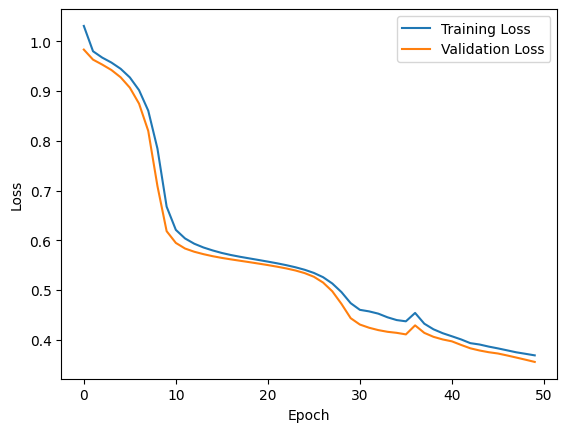

In [54]:
### START CODE HERE ###
# Construct the model & Set the parameters.
input_size = 6  # Number of input features (1 for single sine wave value)
rnn_units = 256  # Number of units in the RNN layer
dense_units = 1024  # Number of units in the Dense layer
output_size = 3  # Number of output classes

model = Model()
# model.add(None)
model.add(RNN(input_size, rnn_units))  # Add RNN layer
model.add(Dense(rnn_units, dense_units))  # Add Dense layer
model.add(Activation("relu", None))  # Add activation function
model.add(Flatten())  # Flatten the output of the last pooling layer
model.add(Dense(dense_units, output_size))  # Add output layer
model.add(Activation("softmax", "cce"))  # Add softmax activation for classification

...
# Train the model
model.train(X_train, y_train, X_val, y_val, epochs=50, learning_rate=0.008, batch_size = 32, loss_function='cce')

### END CODE HERE ###
# Plot the training and validation losses
model.plot_losses()

### 4. Predict the output and Save it
Remember to submit `y_pred.csv` to Kaggle!

In [55]:
# Do not modify this part to get the correct output format!!
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Save the predicted classes to a CSV file
y_pred_df = pd.DataFrame({
    'Id': np.arange(len(y_pred_classes)),
    'Classes': y_pred_classes
})

# Save the DataFrame to a CSV file
y_pred_df.to_csv('y_pred_advanced.csv', index=False)

Epoch 1/25: 320batch [00:43,  7.40batch/s, loss=1.02]


Epoch 1/25, Training Loss: 1.0225848221467877
Epoch 1/25, Validation Loss: 0.9756090267384373


Epoch 2/25: 320batch [00:42,  7.44batch/s, loss=0.968]


Epoch 2/25, Training Loss: 0.9743385813617829
Epoch 2/25, Validation Loss: 0.9579521302042703


Epoch 3/25: 320batch [00:42,  7.52batch/s, loss=0.955]


Epoch 3/25, Training Loss: 0.9611144492373398
Epoch 3/25, Validation Loss: 0.9451913961139475


Epoch 4/25: 320batch [00:42,  7.46batch/s, loss=0.94]


Epoch 4/25, Training Loss: 0.9464454958411785
Epoch 4/25, Validation Loss: 0.9275931907005741


Epoch 5/25: 320batch [00:43,  7.40batch/s, loss=0.918]


Epoch 5/25, Training Loss: 0.9246398146538217
Epoch 5/25, Validation Loss: 0.9001476819025978


Epoch 6/25: 320batch [00:43,  7.38batch/s, loss=0.883]


Epoch 6/25, Training Loss: 0.8885878764806622
Epoch 6/25, Validation Loss: 0.8516431169683149


Epoch 7/25: 320batch [00:43,  7.42batch/s, loss=0.814]


Epoch 7/25, Training Loss: 0.8187733932600786
Epoch 7/25, Validation Loss: 0.7464995953447102


Epoch 8/25: 320batch [00:42,  7.46batch/s, loss=0.683]


Epoch 8/25, Training Loss: 0.6864277978611102
Epoch 8/25, Validation Loss: 0.6195987230689612


Epoch 9/25: 320batch [00:45,  6.98batch/s, loss=0.619]


Epoch 9/25, Training Loss: 0.6224716838733839
Epoch 9/25, Validation Loss: 0.5922457583900446


Epoch 10/25: 320batch [00:45,  7.11batch/s, loss=0.599]


Epoch 10/25, Training Loss: 0.6028433857588014
Epoch 10/25, Validation Loss: 0.5809935928791761


Epoch 11/25: 320batch [00:43,  7.44batch/s, loss=0.588]


Epoch 11/25, Training Loss: 0.5913523400772036
Epoch 11/25, Validation Loss: 0.5736849891859694


Epoch 12/25: 320batch [00:43,  7.41batch/s, loss=0.58]


Epoch 12/25, Training Loss: 0.5834178571215276
Epoch 12/25, Validation Loss: 0.5675781271360747


Epoch 13/25: 320batch [00:43,  7.42batch/s, loss=0.574]


Epoch 13/25, Training Loss: 0.5768788687176867
Epoch 13/25, Validation Loss: 0.5634727786364819


Epoch 14/25: 320batch [00:44,  7.14batch/s, loss=0.569]


Epoch 14/25, Training Loss: 0.571832646909946
Epoch 14/25, Validation Loss: 0.5601394420254919


Epoch 15/25: 320batch [00:44,  7.27batch/s, loss=0.564]


Epoch 15/25, Training Loss: 0.5673543925939989
Epoch 15/25, Validation Loss: 0.556823480959964


Epoch 16/25: 320batch [00:47,  6.74batch/s, loss=0.56]


Epoch 16/25, Training Loss: 0.5632043967546798
Epoch 16/25, Validation Loss: 0.553443813233702


Epoch 17/25: 320batch [00:43,  7.35batch/s, loss=0.556]


Epoch 17/25, Training Loss: 0.5589206465612361
Epoch 17/25, Validation Loss: 0.549711735312917


Epoch 18/25: 320batch [00:43,  7.31batch/s, loss=0.551]


Epoch 18/25, Training Loss: 0.5541402641555688
Epoch 18/25, Validation Loss: 0.5457190516938334


Epoch 19/25: 320batch [00:45,  6.98batch/s, loss=0.546]


Epoch 19/25, Training Loss: 0.5488447782789045
Epoch 19/25, Validation Loss: 0.5409836599429474


Epoch 20/25: 320batch [00:47,  6.74batch/s, loss=0.54]


Epoch 20/25, Training Loss: 0.5426061443764022
Epoch 20/25, Validation Loss: 0.5339730267264857


Epoch 21/25: 320batch [00:43,  7.41batch/s, loss=0.531]


Epoch 21/25, Training Loss: 0.5344121368084775
Epoch 21/25, Validation Loss: 0.52265116930066


Epoch 22/25: 320batch [00:45,  7.02batch/s, loss=0.52]


Epoch 22/25, Training Loss: 0.5225803595726168
Epoch 22/25, Validation Loss: 0.5046111937208961


Epoch 23/25: 320batch [00:43,  7.36batch/s, loss=0.501]


Epoch 23/25, Training Loss: 0.5043026539023406
Epoch 23/25, Validation Loss: 0.47967209866049226


Epoch 24/25: 320batch [00:43,  7.44batch/s, loss=0.467]


Epoch 24/25, Training Loss: 0.4695010357185147
Epoch 24/25, Validation Loss: 0.4522516583648319


Epoch 25/25: 320batch [00:43,  7.36batch/s, loss=0.447]


Epoch 25/25, Training Loss: 0.4496560118833739
Epoch 25/25, Validation Loss: 0.44306847702727037


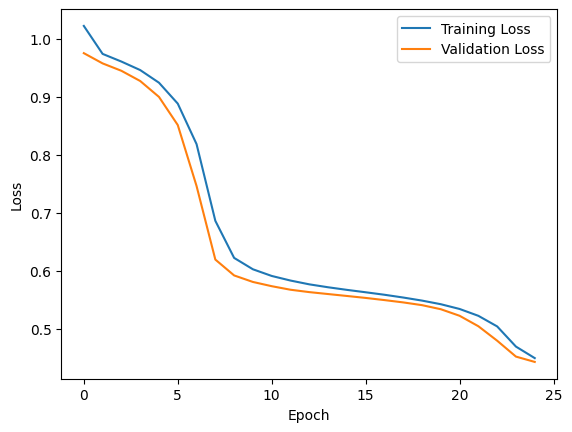

In [56]:
### START CODE HERE ###
# Construct the model & Set the parameters.
input_size = 6  # Number of input features (1 for single sine wave value)
rnn_units = 256  # Number of units in the RNN layer
dense_units = 1024  # Number of units in the Dense layer
output_size = 3  # Number of output classes

model = Model()
# model.add(None)
model.add(RNN(input_size, rnn_units))  # Add RNN layer
model.add(Dense(rnn_units, dense_units))  # Add Dense layer
model.add(Activation("relu", None))  # Add activation function
model.add(Flatten())  # Flatten the output of the last pooling layer
model.add(Dense(dense_units, output_size))  # Add output layer
model.add(Activation("softmax", "cce"))  # Add softmax activation for classification

...
# Train the model
model.train(X_train, y_train, X_val, y_val, epochs=25, learning_rate=0.01, batch_size = 32, loss_function='cce')

### END CODE HERE ###
# Plot the training and validation losses
model.plot_losses()

In [57]:
# Do not modify this part to get the correct output format!!
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Save the predicted classes to a CSV file
y_pred_df = pd.DataFrame({
    'Id': np.arange(len(y_pred_classes)),
    'Classes': y_pred_classes
})

# Save the DataFrame to a CSV file
y_pred_df.to_csv('y_pred_advanced2.csv', index=False)